# Importing Libraries

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data and filtering out spaces from Categorical values of Summary Group

In [3]:
df = pd.read_excel("C:/Users/Yash/Desktop/ML_Projects/Data/Summer Intern Case Study Data_2023.xlsx")
df['Summary Group'] = df['Summary Group'].str.replace(' ', '')
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000


# Month on Sales Growth

In [4]:
df["Week"] = pd.to_datetime(df["Week"], format="%m/%d/%Y")
monthly_sales = df.groupby(pd.Grouper(key="Week", freq="M")).sum()["Sales Volume"]
sales_growth = monthly_sales.pct_change()
print(sales_growth)

Week
2020-10-31         NaN
2020-11-30   -0.053744
2020-12-31   -0.085467
2021-01-31    0.838484
2021-02-28   -0.376797
2021-03-31    0.135098
2021-04-30   -0.112648
2021-05-31    0.120525
2021-06-30   -0.251250
2021-07-31    0.323452
2021-08-31    0.235179
2021-09-30   -0.110440
2021-10-31    0.043208
2021-11-30   -0.254851
2021-12-31    0.039655
2022-01-31    0.622160
2022-02-28   -0.364341
2022-03-31   -0.015062
2022-04-30    0.075278
2022-05-31   -0.219168
2022-06-30   -0.093990
2022-07-31    0.221244
2022-08-31   -0.048502
2022-09-30   -0.078358
2022-10-31   -0.766016
Freq: M, Name: Sales Volume, dtype: float64


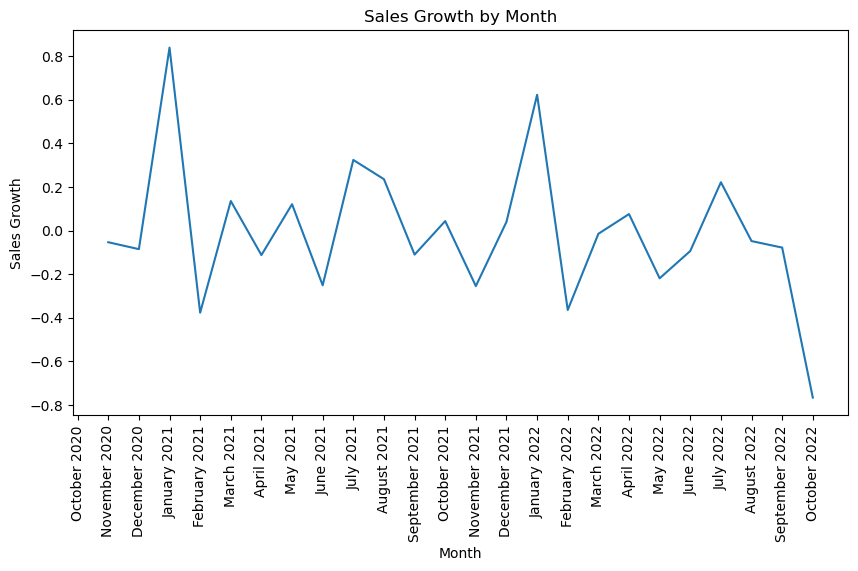

In [5]:
s = pd.Series(data=[None, -0.053744, -0.085467, 0.838484, -0.376797, 0.135098, -0.112648,
                    0.120525, -0.251250, 0.323452, 0.235179, -0.110440, 0.043208, -0.254851,
                    0.039655, 0.622160, -0.364341, -0.015062, 0.075278, -0.219168, -0.093990,
                    0.221244, -0.048502, -0.078358, -0.766016],
              index=pd.date_range(start='2020-10-31', periods=25, freq='M'))

s.index = s.index.strftime('%B %Y')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(s.index, s)
ax.set_xlabel('Month')
plt.xticks(rotation=90)
ax.set_ylabel('Sales Growth')
ax.set_title('Sales Growth by Month')
plt.show()

month_name  year
April       2021    4.655417e+06
            2022    5.012806e+06
August      2021    6.384911e+06
            2022    4.120803e+06
December    2020    4.034037e+06
            2021    4.590218e+06
February    2021    4.621991e+06
            2022    4.733158e+06
January     2021    7.416511e+06
            2022    7.446069e+06
July        2021    5.169221e+06
            2022    4.330860e+06
June        2021    3.905861e+06
            2022    3.546268e+06
March       2021    5.246414e+06
            2022    4.661868e+06
May         2021    5.216512e+06
            2022    3.914161e+06
November    2020    4.411034e+06
            2021    4.415134e+06
October     2020    4.661567e+06
            2021    5.925169e+06
            2022    8.886470e+05
September   2021    5.679759e+06
            2022    3.797904e+06
Name: Profit, dtype: float64


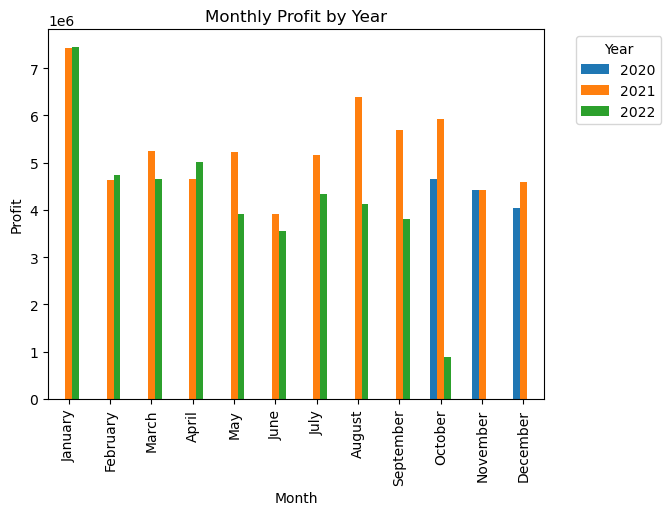

In [6]:
df['month_name'] = df['Week'].dt.strftime('%B')
df['year'] = df['Week'].dt.year
monthly_profit = df.groupby(['month_name', 'year'])["Profit"].sum()
print(monthly_profit)

monthly_profit = monthly_profit.reset_index().pivot(index='month_name', columns='year', values='Profit')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# reindex the rows of monthly_profit based on the month_order list
monthly_profit = monthly_profit.reindex(month_order)

# plot a bar plot
ax = monthly_profit.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Monthly Profit by Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Grouping By Summary Group to get ROI for each category

In [7]:
group_SummaryGroup = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
group_SummaryGroup = group_SummaryGroup.sort_values(by="Profit", ascending = False)
print(group_SummaryGroup)

                   Sales Volume        Profit         Spend
Summary Group                                              
Base               1.702652e+09  1.021591e+08  0.000000e+00
Media              1.619078e+08  9.714469e+06  1.675635e+07
Trade              1.037003e+08  6.222021e+06  1.267035e+07
ConsumerPromotion  1.151139e+07  6.906833e+05  2.698325e+06


In [205]:
group_SummaryGroup["ROI"] = ((group_SummaryGroup["Profit"] - group_SummaryGroup["Spend"]) / group_SummaryGroup["Spend"]) * 100
group_SummaryGroup.sort_values(['Spend','Profit'],ascending = [True,False])

,Sales Volume,Profit,Spend,ROI
Summary Group,,,,
Base,1.702652e+09,1.021591e+08,0.000000e+00,inf
ConsumerPromotion,1.151139e+07,6.906833e+05,2.698325e+06,-74.403257
Trade,1.037003e+08,6.222021e+06,1.267035e+07,-50.893058
Media,1.619078e+08,9.714469e+06,1.675635e+07,-42.025136


In [9]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020


<AxesSubplot:xlabel='Summary Group', ylabel='Profit'>

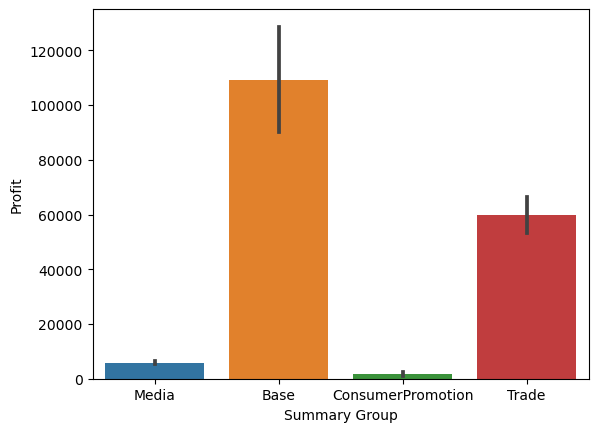

In [10]:
sns.barplot(x=df["Summary Group"], y=df["Profit"])

<AxesSubplot:xlabel='Summary Group', ylabel='Spend'>

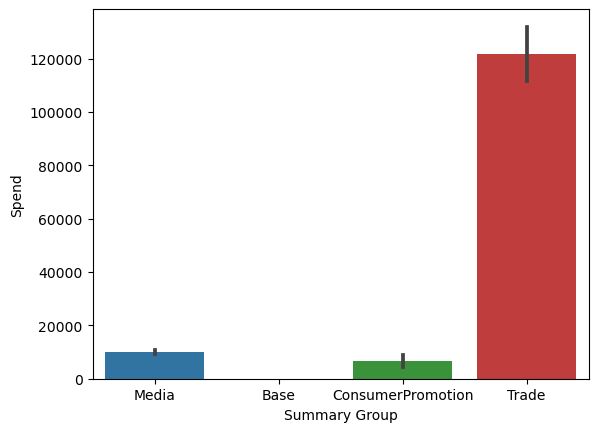

In [11]:
sns.barplot(x=df["Summary Group"], y=df["Spend"])

<AxesSubplot:xlabel='Summary Group', ylabel='Sales Volume'>

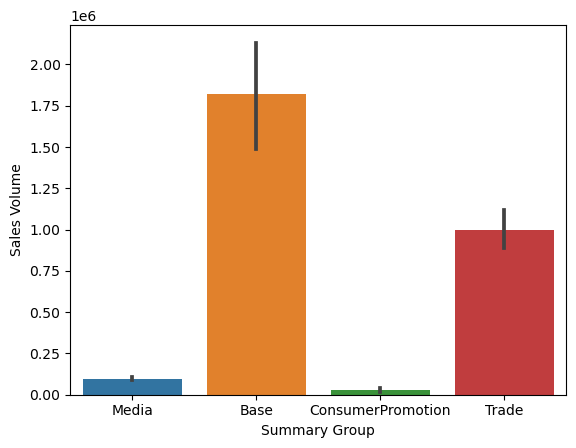

In [12]:
sns.barplot(x=df["Summary Group"], y=df["Sales Volume"])

In [13]:
df.columns

Index(['Week', 'Event', 'Summary Group', 'Tactic', 'Execution', 'Sales Volume',
       'Profit', 'Spend', 'month_name', 'year'],
      dtype='object')

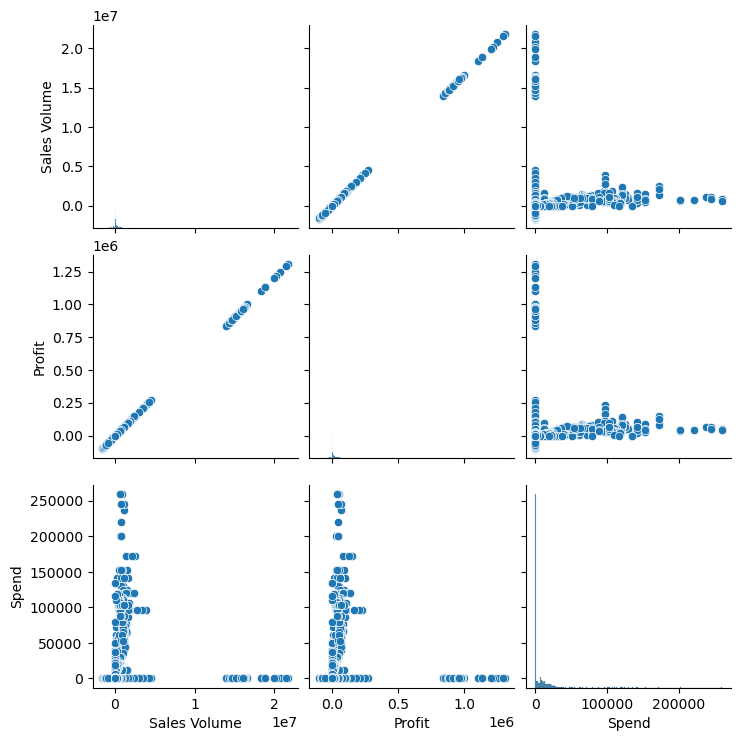

In [14]:
sns.pairplot(df[['Sales Volume', 'Profit', 'Spend']])

In [ ]:
from scipy.stats import pearsonr

# Assuming x and y are your two variables
corr, p_value = pearsonr(media_df['Spend'], media_df['Sales Volume'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

In [ ]:
from scipy.stats import pearsonr

# Assuming x and y are your two variables
corr, p_value = pearsonr(consumer_promo_df['Spend'], consumer_promo_df['Sales Volume'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

In [ ]:
roi_media.groupby('year')

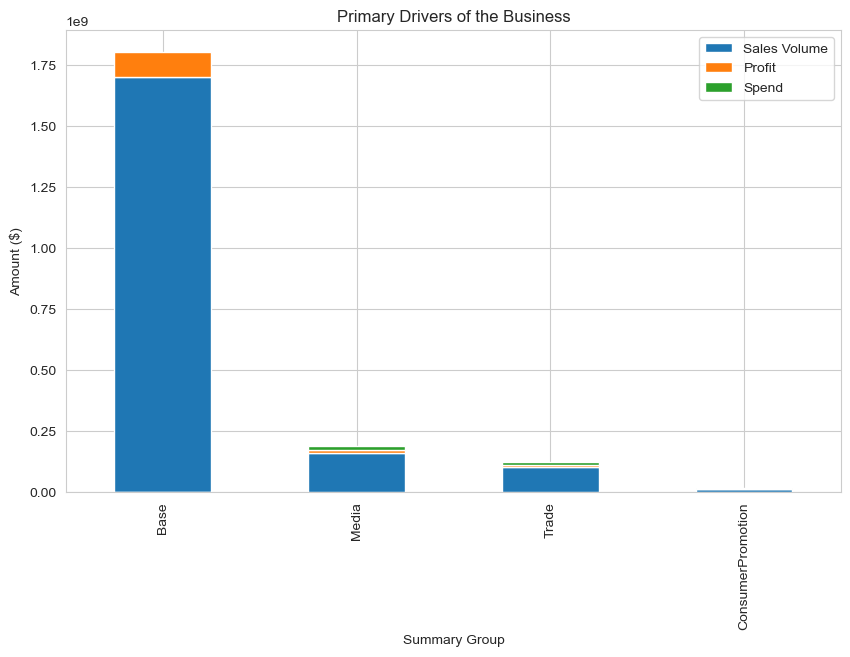

In [17]:
grouped_data = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
grouped_data = grouped_data.sort_values(by="Profit", ascending=False)

sns.set_style("whitegrid")
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Amount ($)')
ax.set_title('Primary Drivers of the Business')
plt.show()

# Converting Week to Year, Day of Week, Month, and Quarter

In [18]:
df['Week'] = pd.to_datetime(df['Week'])

# extract day of the week and week number
df['day_of_week'] = df['Week'].dt.day_name()
#df['week_number'] = df['Week'].dt.week

# extract other relevant time-based features
df['year'] = df['Week'].dt.year
df['month'] = df['Week'].dt.month
df['quarter'] = df['Week'].dt.quarter

In [19]:
df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,day_of_week,month,quarter
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,Saturday,10,4
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,Saturday,10,4
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,Saturday,10,4
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,Saturday,10,4
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,Saturday,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,2022-10-01,Seasonality,Base,Seasonality,0.000000,2.634118e+05,15804.705870,0.000000,October,2022,Saturday,10,4
3116,2022-10-01,Trade Promo,Trade,Trade Promo,0.000000,6.178045e+05,37068.267690,88556.856510,October,2022,Saturday,10,4
3117,2022-10-01,Trend,Base,Trend,0.000000,2.246527e+05,13479.160410,0.000000,October,2022,Saturday,10,4
3118,2022-10-01,VPC,Base,VPC,0.000000,0.000000e+00,0.000000,0.000000,October,2022,Saturday,10,4


In [20]:
df = df.drop("Week",axis=1)

In [21]:
df = df.drop("day_of_week",axis=1)

In [22]:
df.head()

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
2,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,10,4
3,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,10,4
4,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,10,4


# Doing Label Encoding for the Year Categorical Column

In [23]:
#from sklearn.preprocessing import LabelEncoder

#label = LabelEncoder()

# fit and transform the day_of_week column
#df['year'] = label.fit_transform(df['year'])

# print the encoded values
#print(df['year'].unique())

# Analyzing Summary Groups separately

In [24]:
base_df = df[df['Summary Group'] == 'Base']
media_df = df[df['Summary Group'] == 'Media']
trade_df = df[df['Summary Group'] == 'Trade']
consumer_promo_df = df[df['Summary Group'] == 'ConsumerPromotion']

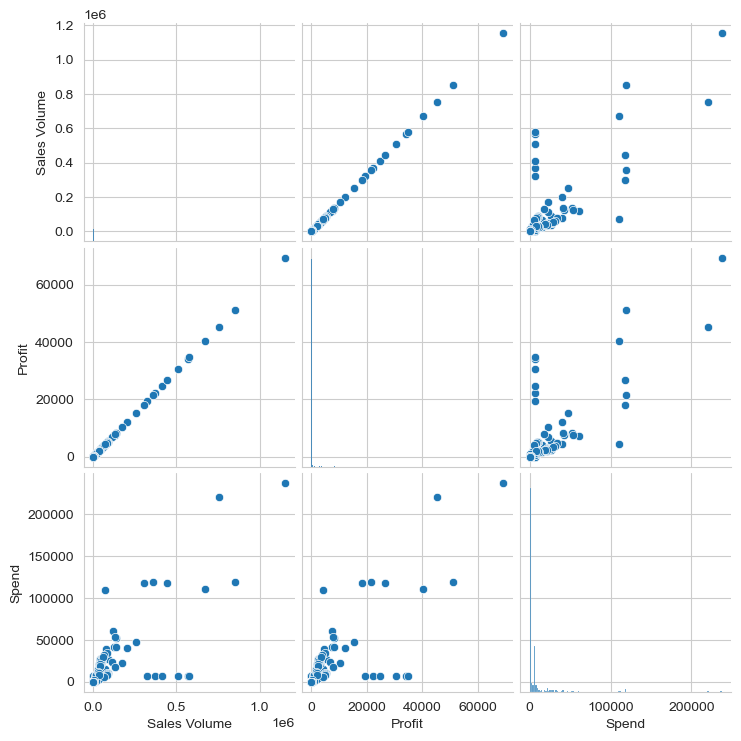

In [25]:
sns.pairplot(consumer_promo_df[['Sales Volume', 'Profit', 'Spend']])

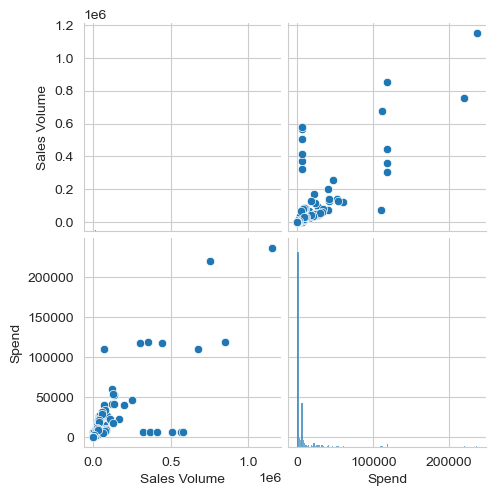

In [26]:
sns.pairplot(consumer_promo_df[['Sales Volume','Spend']])

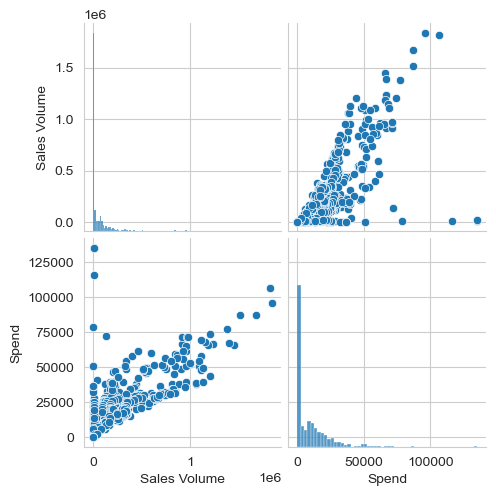

In [27]:
sns.pairplot(media_df[['Sales Volume','Spend']])

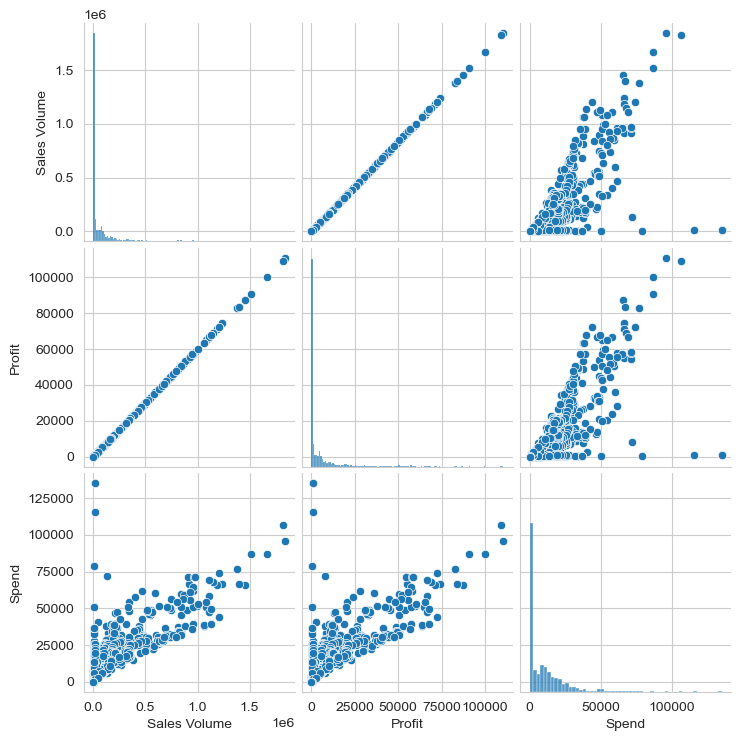

In [28]:
sns.pairplot(media_df[['Sales Volume', 'Profit', 'Spend']])

# Cost Benefit Analysis

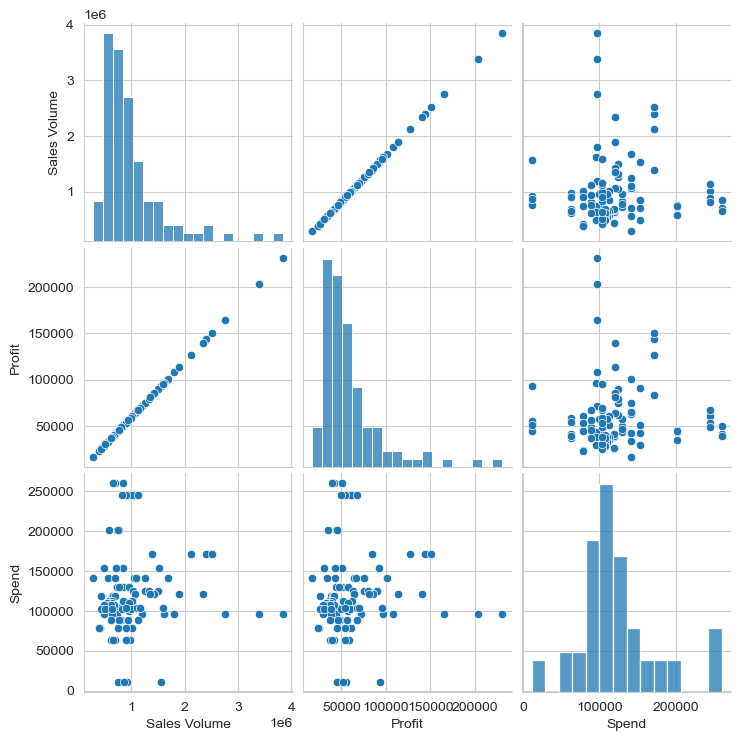

In [29]:
sns.pairplot(trade_df[['Sales Volume', 'Profit', 'Spend']])

In [143]:
cba_base = base_df.groupby(['Tactic', 'month_name',"year",'quarter'])
cost = cba_base['Spend'].sum()
benefit = cba_base['Profit'].sum()

roi = benefit / cost

roi_base = roi.reset_index(name='ROI')
print(roi_base)

    Tactic month_name  year  quarter  ROI
0    COVID      April  2021        2  inf
1    COVID      April  2022        2  inf
2    COVID     August  2021        3  inf
3    COVID     August  2022        3  NaN
4    COVID   December  2020        4 -inf
..     ...        ...   ...      ...  ...
220    VPC    October  2020        4  inf
221    VPC    October  2021        4  inf
222    VPC    October  2022        4  NaN
223    VPC  September  2021        3  inf
224    VPC  September  2022        3  inf

[225 rows x 5 columns]


In [141]:
cba_base

In [144]:
cba_media = media_df.groupby(['Tactic', 'month_name',"year",'quarter'])
cost = cba_media['Spend'].sum()
benefit = cba_media['Profit'].sum()

roi = benefit / cost

roi_media = roi.reset_index(name='ROI')
print(roi_media)

             Tactic month_name  year  quarter       ROI
0    Amazon Display      April  2021        2  0.287506
1    Amazon Display      April  2022        2  0.164472
2    Amazon Display     August  2021        3  0.277675
3    Amazon Display     August  2022        3  0.157349
4    Amazon Display   December  2020        4  0.275619
..              ...        ...   ...      ...       ...
370         YouTube    October  2020        4       NaN
371         YouTube    October  2021        4       NaN
372         YouTube    October  2022        4       NaN
373         YouTube  September  2021        3       NaN
374         YouTube  September  2022        3       NaN

[375 rows x 5 columns]


In [145]:
cba_trade = trade_df.groupby(['Tactic', 'month_name',"year",'quarter'])
cost = cba_trade['Spend'].sum()
benefit = cba_trade['Profit'].sum()

roi = benefit / cost

roi_trade = roi.reset_index(name='ROI')
print(roi_trade)

         Tactic month_name  year  quarter       ROI
0   Trade Promo      April  2021        2  5.465545
1   Trade Promo      April  2022        2  0.528314
2   Trade Promo     August  2021        3  0.618523
3   Trade Promo     August  2022        3  0.693354
4   Trade Promo   December  2020        4  0.176602
5   Trade Promo   December  2021        4  0.210743
6   Trade Promo   February  2021        1  0.483557
7   Trade Promo   February  2022        1  0.544785
8   Trade Promo    January  2021        1  1.621122
9   Trade Promo    January  2022        1  0.804219
10  Trade Promo       July  2021        3  0.408231
11  Trade Promo       July  2022        3  0.396017
12  Trade Promo       June  2021        2  0.382789
13  Trade Promo       June  2022        2  0.329197
14  Trade Promo      March  2021        1  0.736482
15  Trade Promo      March  2022        1  0.413880
16  Trade Promo        May  2021        2  0.732515
17  Trade Promo        May  2022        2  0.371941
18  Trade Pr

In [146]:
cba_consumer = consumer_promo_df.groupby(['Tactic', 'month_name',"year",'quarter'])
cost = cba_consumer['Spend'].sum()
benefit = cba_consumer['Profit'].sum()

roi = benefit / cost

roi_consumer = roi.reset_index(name='ROI')
print(roi_consumer)

             Tactic month_name  year  quarter       ROI
0   Digital Coupons      April  2021        2  0.304873
1   Digital Coupons      April  2022        2  0.444479
2   Digital Coupons     August  2021        3  0.150790
3   Digital Coupons     August  2022        3  0.215122
4   Digital Coupons   December  2020        4  0.405273
5   Digital Coupons   December  2021        4  0.713788
6   Digital Coupons   February  2021        1  0.202419
7   Digital Coupons   February  2022        1  0.198022
8   Digital Coupons    January  2021        1  0.220037
9   Digital Coupons    January  2022        1  0.286311
10  Digital Coupons       July  2021        3  0.170406
11  Digital Coupons       July  2022        3  0.446976
12  Digital Coupons       June  2021        2  0.096197
13  Digital Coupons       June  2022        2  0.203600
14  Digital Coupons      March  2021        1  0.192124
15  Digital Coupons      March  2022        1  0.263744
16  Digital Coupons        May  2021        2  0

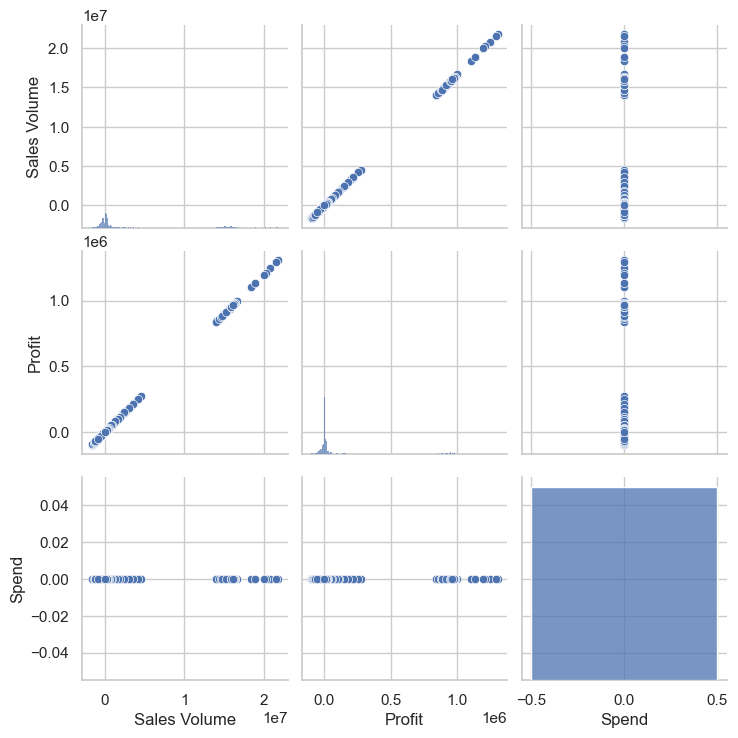

In [136]:
sns.pairplot(base_df[['Sales Volume', 'Profit', 'Spend']])

In [36]:
a = media_df.groupby(['year','quarter','Tactic'])['Profit'].sum().reset_index()

In [37]:
b = base_df.groupby(['year','quarter','Tactic'])['Profit'].sum().reset_index()

In [38]:
b['year_quarter'] = b['year'].astype(str) + '-Q' + b['quarter'].astype(str)

In [39]:
combine_group = base_df.merge(media_df)
combine_group = combine_group.merge(trade_df)
combine_group = combine_group.merge(consumer_promo_df)

In [40]:
combine_group

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter


In [41]:
df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
2,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,10,4
3,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,10,4
4,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3115,Seasonality,Base,Seasonality,0.000000,2.634118e+05,15804.705870,0.000000,October,2022,10,4
3116,Trade Promo,Trade,Trade Promo,0.000000,6.178045e+05,37068.267690,88556.856510,October,2022,10,4
3117,Trend,Base,Trend,0.000000,2.246527e+05,13479.160410,0.000000,October,2022,10,4
3118,VPC,Base,VPC,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4


In [42]:
result = a.groupby(['year', 'quarter']).apply(lambda x: x.loc[x['Profit'].nlargest(1).index]['Tactic']).reset_index()

In [43]:
result.head(25)

,year,quarter,level_2,Tactic
0,2020,4,2,Digital Display
1,2021,1,17,Digital Display
2,2021,2,32,Digital Display
3,2021,3,52,PR
4,2021,4,62,Digital Display
5,2022,1,77,Digital Display
6,2022,2,92,Digital Display
7,2022,3,107,Digital Display
8,2022,4,121,Amazon Search


In [44]:
df_covid = b[b['Tactic'] == 'COVID']
df_covid['year_quarter'] = df_covid['year'].astype(str) + '-Q' + df_covid['quarter'].astype(str)

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\2481104261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['year_quarter'] = df_covid['year'].astype(str) + '-Q' + df_covid['quarter'].astype(str)


In [45]:
print(df_max_profit)

NameError: name 'df_max_profit' is not defined

In [46]:
df_covid

,year,quarter,Tactic,Profit,year_quarter
0,2020,4,COVID,-3.977648e+05,2020-Q4
9,2021,1,COVID,-5.447487e+04,2021-Q1
18,2021,2,COVID,6.157973e+05,2021-Q2
27,2021,3,COVID,1.929664e+06,2021-Q3
36,2021,4,COVID,1.803146e+06,2021-Q4
45,2022,1,COVID,1.175607e+06,2022-Q1
54,2022,2,COVID,1.320315e+05,2022-Q2
63,2022,3,COVID,0.000000e+00,2022-Q3
72,2022,4,COVID,0.000000e+00,2022-Q4


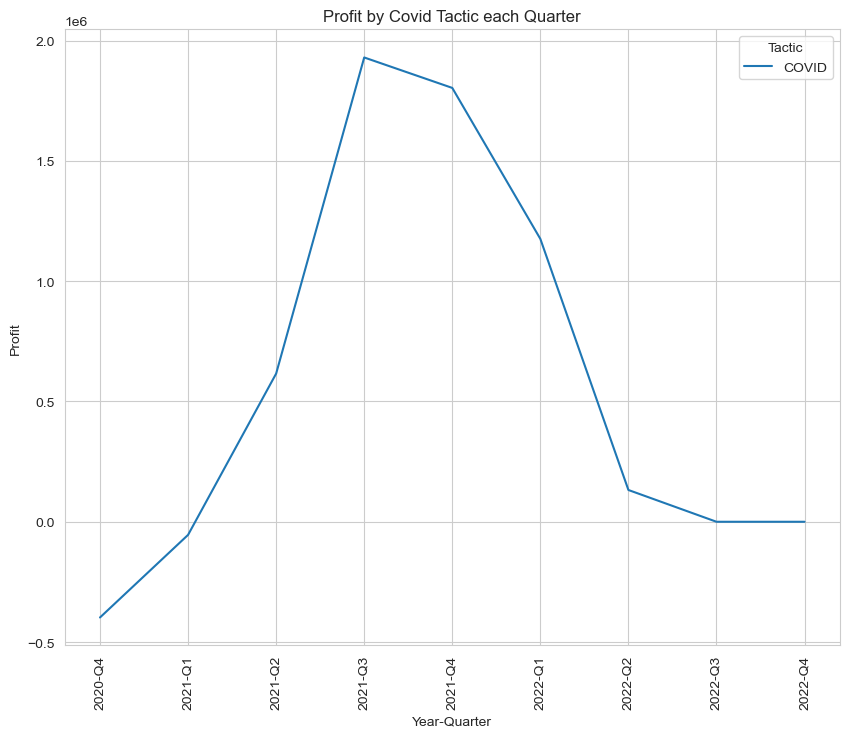

In [47]:
plt.figure(figsize=(10,8))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=df_covid, markers=True)
plt.xticks(rotation=90)
plt.title('Profit by Covid Tactic each Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Profit')
plt.show()

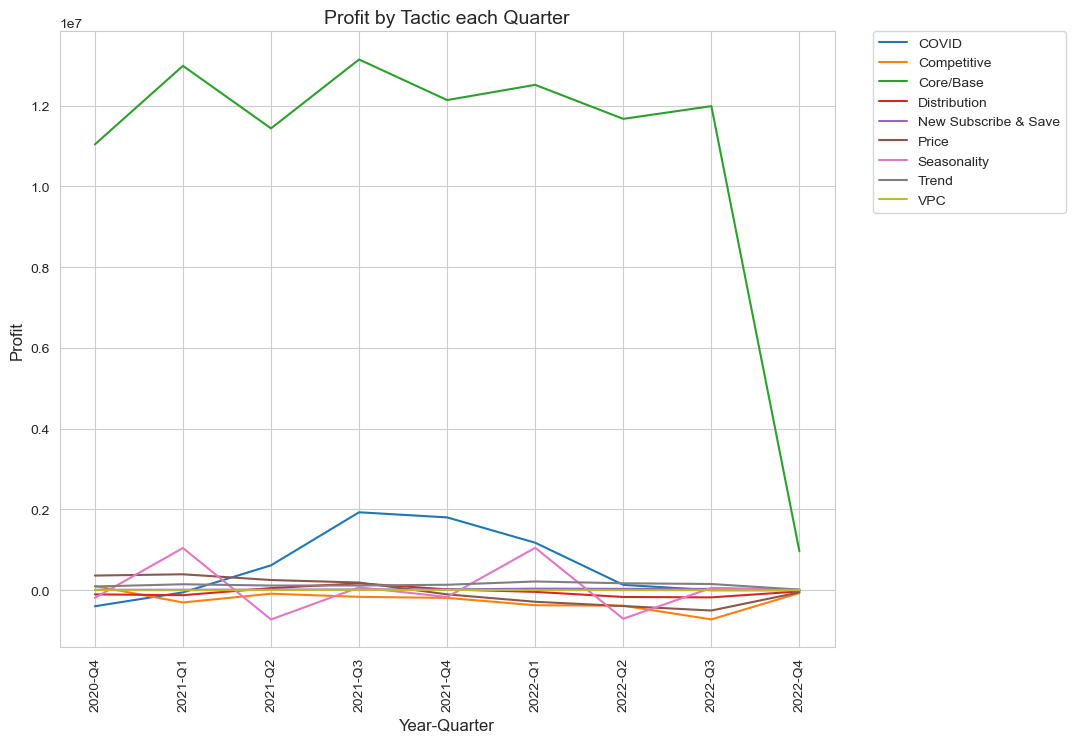

In [49]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
colors = sns.color_palette("tab10", n_colors=len(b['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=b, markers=True, palette=colors)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Profit by Tactic each Quarter', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
plt.show()


# Finding Tactic with high Profits

In [ ]:
base_df

In [121]:
base_max = base_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
base_max

Tactic
Core/Base               9.790302e+07
COVID                   5.204005e+06
Trend                   1.157379e+06
Seasonality             4.481112e+05
New Subscribe & Save    1.766816e+05
VPC                     1.615597e+04
Price                  -1.433033e+05
Distribution           -4.055673e+05
Competitive            -2.197355e+06
Name: Profit, dtype: float64

In [122]:
media_max = media_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
media_max

Tactic
Digital Display             3.940335e+06
Paid Social: Meta           1.795403e+06
Amazon Search               8.184402e+05
OLV                         6.417299e+05
Amazon Display              6.230623e+05
Paid Search: Google+Bing    6.052218e+05
PR                          4.295700e+05
Paid Social: Pinterest      4.180926e+05
Paid Search: Criteo         1.179821e+05
Ecomm: Retail Display       7.113060e+04
Influencer                  6.651764e+04
Ecomm: Search               5.941255e+04
Paid Search: Pinterest      5.716338e+04
YouTube                     4.512534e+04
Paid Social: Twitter        2.528167e+04
Name: Profit, dtype: float64

In [123]:
consumer_max = consumer_promo_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
consumer_max

Tactic
Digital Coupons    525175.862541
Sampling           165507.429700
Name: Profit, dtype: float64

In [124]:
trade_max = trade_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
trade_max

Tactic
Trade Promo    6.222021e+06
Name: Profit, dtype: float64

In [125]:
result_max = pd.concat([base_max, media_max, trade_max, consumer_max])
result_max = result_max.sort_values(ascending=False)
result_max

Tactic
Core/Base                   9.790302e+07
Trade Promo                 6.222021e+06
COVID                       5.204005e+06
Digital Display             3.940335e+06
Paid Social: Meta           1.795403e+06
Trend                       1.157379e+06
Amazon Search               8.184402e+05
OLV                         6.417299e+05
Amazon Display              6.230623e+05
Paid Search: Google+Bing    6.052218e+05
Digital Coupons             5.251759e+05
Seasonality                 4.481112e+05
PR                          4.295700e+05
Paid Social: Pinterest      4.180926e+05
New Subscribe & Save        1.766816e+05
Sampling                    1.655074e+05
Paid Search: Criteo         1.179821e+05
Ecomm: Retail Display       7.113060e+04
Influencer                  6.651764e+04
Ecomm: Search               5.941255e+04
Paid Search: Pinterest      5.716338e+04
YouTube                     4.512534e+04
Paid Social: Twitter        2.528167e+04
VPC                         1.615597e+04
Price    

NameError: name 'consumer_promo_df' is not defined

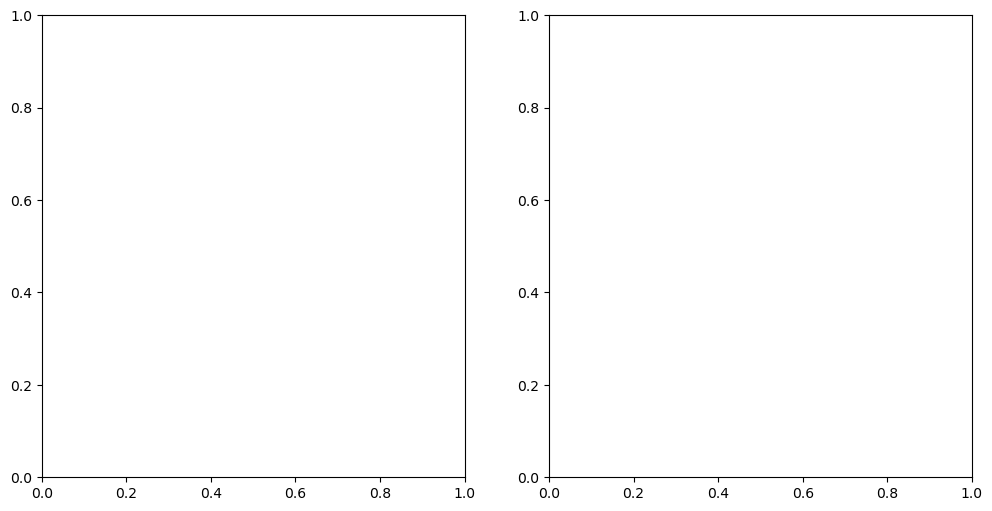

In [16]:
import seaborn as sns

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Consumer promotion subplot
sns.regplot(x='Spend', y='Sales Volume', data=consumer_promo_df, ax=ax1)
ax1.set_title('Consumer Promotion')

# Media subplot
sns.regplot(x='Spend', y='Sales Volume', data=media_df, ax=ax2)
ax2.set_title('Media')

plt.tight_layout()
plt.show()


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=result_max.values, y=result_max.index, palette="Blues_d")
ax.set_xlabel('Profit')
ax.set_ylabel('Tactic')
ax.set_title('Overall Profit by Tactics')
plt.xticks(rotation=65)
plt.show()

# Playing with roi_base, roi_media, roi_consumer, roi_trade

In [126]:
roi_base

,Tactic,month_name,year,ROI,month_year
0,COVID,October,2020,-inf,October 2020
1,Competitive,October,2020,inf,October 2020
2,Core/Base,October,2020,inf,October 2020
3,Distribution,October,2020,inf,October 2020
4,New Subscribe & Save,October,2020,inf,October 2020
...,...,...,...,...,...
220,New Subscribe & Save,October,2022,inf,October 2022
221,Price,October,2022,-inf,October 2022
222,Seasonality,October,2022,inf,October 2022
223,Trend,October,2022,inf,October 2022


In [127]:
roi_base_max = roi_base.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)
roi_base_max

,Tactic,ROI
0,COVID,NaN
1,Competitive,NaN
2,Core/Base,NaN
3,Distribution,NaN
4,New Subscribe & Save,NaN
5,Price,NaN
6,Seasonality,NaN
7,Trend,NaN
8,VPC,NaN


In [128]:
roi_media_max = roi_media.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)
roi_media_max

,Tactic,ROI
12,Paid Social: Pinterest,41.152087
7,PR,31.016679
2,Digital Display,26.599072
11,Paid Social: Meta,18.499242
9,Paid Search: Google+Bing,12.709207
1,Amazon Search,12.510184
6,OLV,11.769345
8,Paid Search: Criteo,10.227908
0,Amazon Display,6.318435
10,Paid Search: Pinterest,2.943538


In [129]:
roi_trade_max = roi_trade.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [130]:
roi_consumer_max = roi_consumer.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [131]:
roi_media_max

,Tactic,ROI
12,Paid Social: Pinterest,41.152087
7,PR,31.016679
2,Digital Display,26.599072
11,Paid Social: Meta,18.499242
9,Paid Search: Google+Bing,12.709207
1,Amazon Search,12.510184
6,OLV,11.769345
8,Paid Search: Criteo,10.227908
0,Amazon Display,6.318435
10,Paid Search: Pinterest,2.943538


In [ ]:
roi_result_max = pd.concat([roi_base_max, roi_media_max, roi_trade_max, roi_consumer_max])
roi_result_max = roi_result_max.sort_values('ROI',ascending=False)
roi_result_max

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=roi_result_max['ROI'], y=roi_result_max['Tactic'], palette="Blues_d")
ax.set_xlabel('ROI')
ax.set_ylabel('Tactic')
ax.set_title('Overall Return on Investment by Tactics')
plt.xticks(rotation=65)
plt.show()

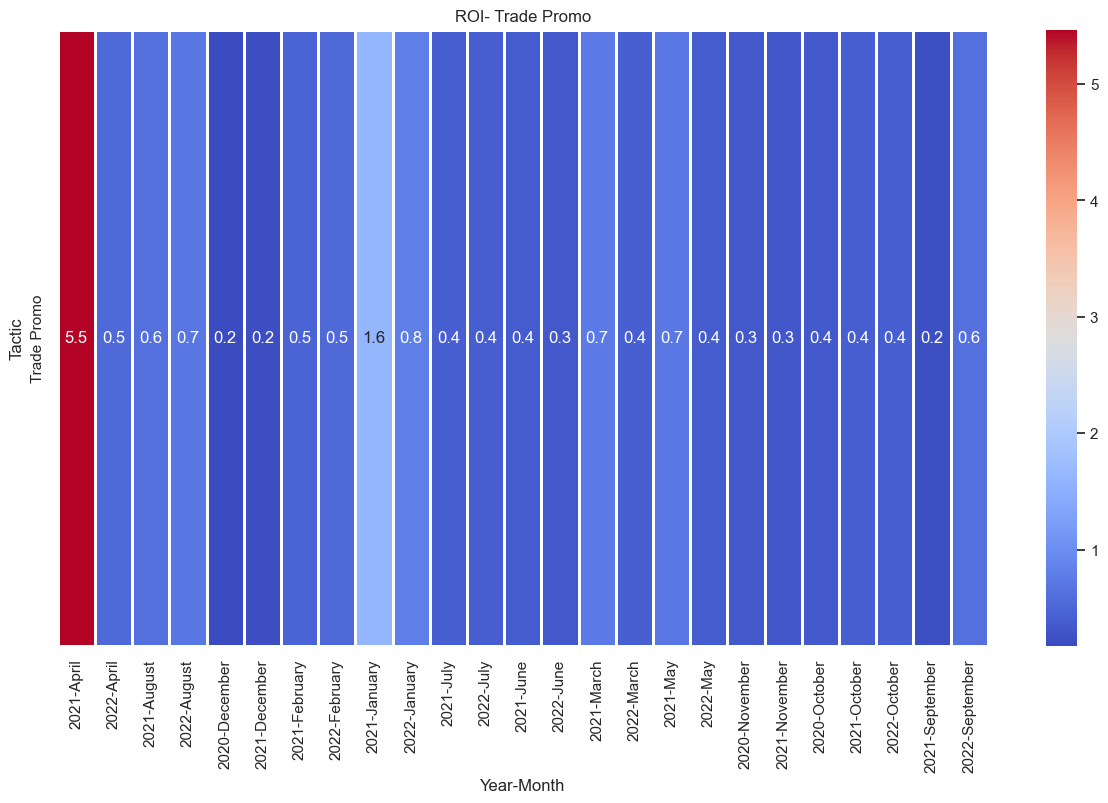

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_trade.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI- Trade Promo')

plt.xticks(rotation=90)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_consumer.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI- Consumer Promotion')

plt.xticks(rotation=90)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_media.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI- Media')

plt.xticks(rotation=90)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_base.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI by Tactic, Month and Year')

plt.xticks(rotation=90)

plt.show()

NameError: name 'result_max' is not defined

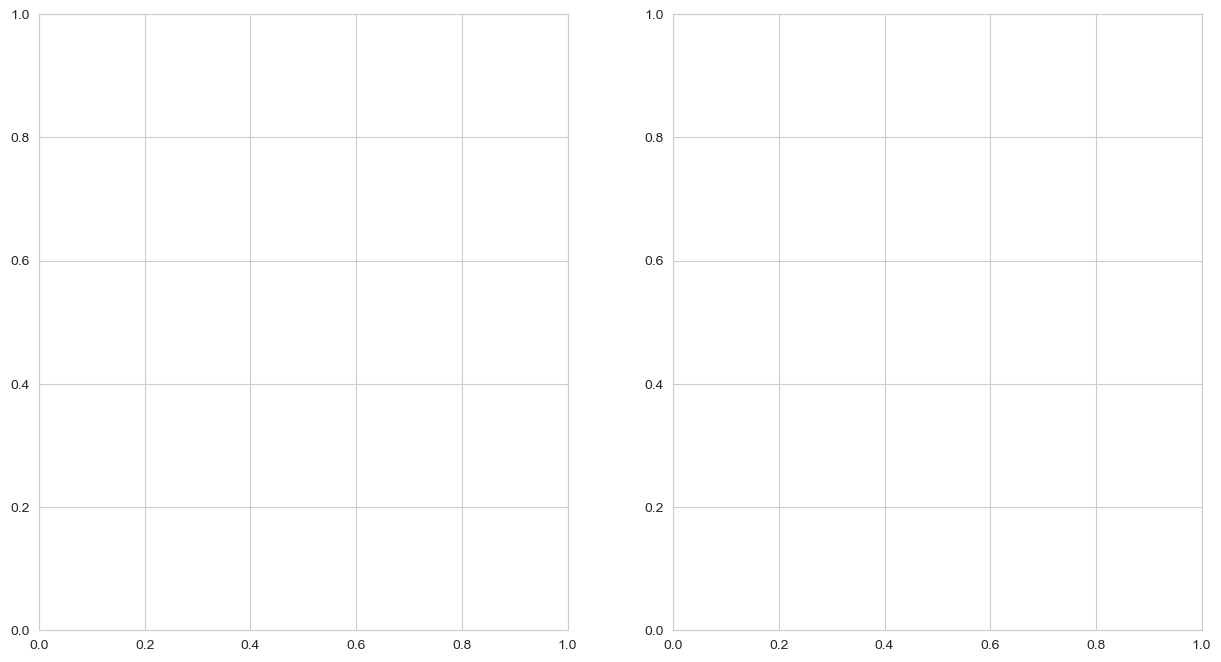

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

# Plot the first graph in the first subplot
sns.barplot(x=result_max.values, y=result_max.index, palette="Blues_d", ax=ax1)
ax1.set_xlabel('Profit')
ax1.set_ylabel('Tactic')
ax1.set_title('Overall Profit by Tactics')
ax1.tick_params(axis='y', labelrotation=0)

# Plot the second graph in the second subplot
sns.barplot(x=roi_result_max['ROI'], y=roi_result_max['Tactic'], palette="Blues_d", ax=ax2)
ax2.set_xlabel('ROI')
ax2.set_ylabel('')
ax2.set_title('Overall Return on Investment by Tactics')
ax2.tick_params(axis='y', labelrotation=0)

# Adjust the layout to make room for the y-axis label of the second subplot
plt.subplots_adjust(wspace=0.4)

plt.show()


# Testing

In [51]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_trade['month_name'] = roi_trade['month_name'].astype(cat_month)

roi_trade = roi_trade.sort_values(by=['year', 'month_name'])

roi_trade = roi_trade.reset_index(drop=True)
roi_trade = pd.DataFrame(roi_trade)
roi_trade

,Tactic,month_name,year,ROI
0,Trade Promo,October,2020,0.351949
1,Trade Promo,November,2020,0.339202
2,Trade Promo,December,2020,0.176602
3,Trade Promo,January,2021,1.621122
4,Trade Promo,February,2021,0.483557
5,Trade Promo,March,2021,0.736482
6,Trade Promo,April,2021,5.465545
7,Trade Promo,May,2021,0.732515
8,Trade Promo,June,2021,0.382789
9,Trade Promo,July,2021,0.408231


In [52]:
roi_trade['month_year'] = roi_trade['month_name'].astype(str) + ' ' + roi_trade['year'].astype(str)
print(roi_trade)

         Tactic month_name  year       ROI      month_year
0   Trade Promo    October  2020  0.351949    October 2020
1   Trade Promo   November  2020  0.339202   November 2020
2   Trade Promo   December  2020  0.176602   December 2020
3   Trade Promo    January  2021  1.621122    January 2021
4   Trade Promo   February  2021  0.483557   February 2021
5   Trade Promo      March  2021  0.736482      March 2021
6   Trade Promo      April  2021  5.465545      April 2021
7   Trade Promo        May  2021  0.732515        May 2021
8   Trade Promo       June  2021  0.382789       June 2021
9   Trade Promo       July  2021  0.408231       July 2021
10  Trade Promo     August  2021  0.618523     August 2021
11  Trade Promo  September  2021  0.236571  September 2021
12  Trade Promo    October  2021  0.384398    October 2021
13  Trade Promo   November  2021  0.306949   November 2021
14  Trade Promo   December  2021  0.210743   December 2021
15  Trade Promo    January  2022  0.804219    January 20

In [229]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_base['month_name'] = roi_base['month_name'].astype(cat_month)

roi_base = roi_base.sort_values(by=['year', 'month_name'])

roi_base = roi_base.reset_index(drop=True)
roi_base = pd.DataFrame(roi_base)
print(roi_base)

                   Tactic month_name  year  quarter  ROI
0                   COVID    October  2020        4 -inf
1             Competitive    October  2020        4  inf
2               Core/Base    October  2020        4  inf
3            Distribution    October  2020        4  inf
4    New Subscribe & Save    October  2020        4  inf
..                    ...        ...   ...      ...  ...
220  New Subscribe & Save    October  2022        4  inf
221                 Price    October  2022        4 -inf
222           Seasonality    October  2022        4  inf
223                 Trend    October  2022        4  inf
224                   VPC    October  2022        4  NaN

[225 rows x 5 columns]


In [230]:
roi_base['month_year'] = roi_base['month_name'].astype(str) + ' ' + roi_base['year'].astype(str)

In [231]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_media['month_name'] = roi_media['month_name'].astype(cat_month)

roi_media = roi_media.sort_values(by=['year', 'month_name'])

roi_media = roi_media.reset_index(drop=True)
roi_media = pd.DataFrame(roi_media)
print(roi_media)

                     Tactic month_name  year  quarter        ROI
0            Amazon Display    October  2020        4   0.285349
1             Amazon Search    October  2020        4   0.321215
2           Digital Display    October  2020        4   1.073578
3     Ecomm: Retail Display    October  2020        4        NaN
4             Ecomm: Search    October  2020        4   0.085762
..                      ...        ...   ...      ...        ...
370  Paid Search: Pinterest    October  2022        4   0.193493
371       Paid Social: Meta    October  2022        4        NaN
372  Paid Social: Pinterest    October  2022        4  31.399743
373    Paid Social: Twitter    October  2022        4        NaN
374                 YouTube    October  2022        4        NaN

[375 rows x 5 columns]


In [232]:
roi_media['month_year'] = roi_media['month_name'].astype(str) + ' ' + roi_media['year'].astype(str)

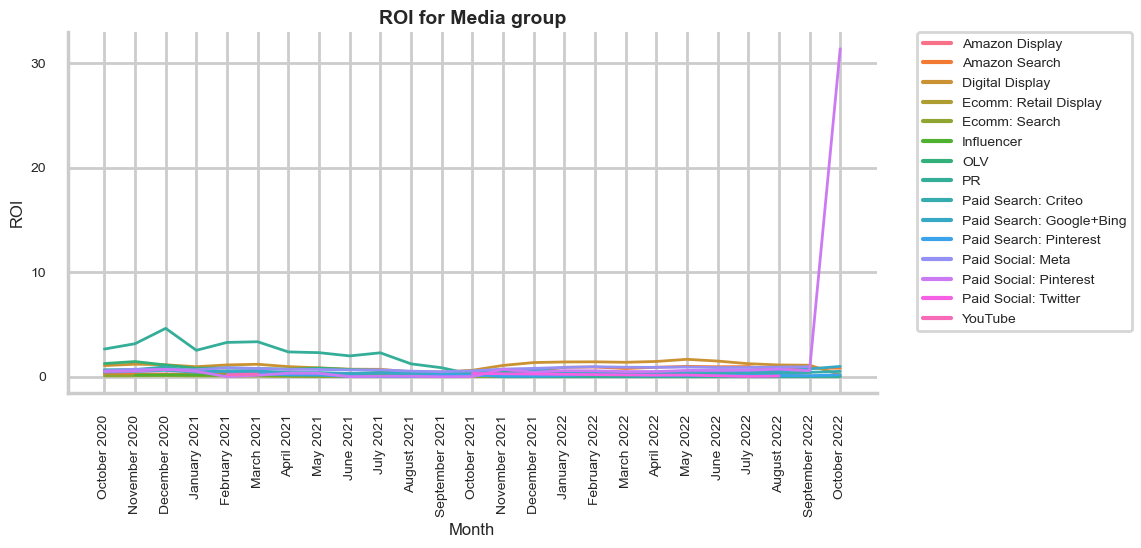

In [233]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_media, markers=True, palette='husl', linewidth=2)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('ROI for Media group', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [58]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_consumer['month_name'] = roi_consumer['month_name'].astype(cat_month)

roi_consumer = roi_consumer.sort_values(by=['year', 'month_name'])

roi_consumer = roi_consumer.reset_index(drop=True)
print(roi_consumer)

             Tactic month_name  year       ROI
0   Digital Coupons    October  2020       NaN
1          Sampling    October  2020  0.000000
2   Digital Coupons   November  2020  0.167051
3          Sampling   November  2020  0.000000
4   Digital Coupons   December  2020  0.405273
5          Sampling   December  2020  0.000000
6   Digital Coupons    January  2021  0.220037
7          Sampling    January  2021  3.978193
8   Digital Coupons   February  2021  0.202419
9          Sampling   February  2021  1.318477
10  Digital Coupons      March  2021  0.192124
11         Sampling      March  2021  0.000000
12  Digital Coupons      April  2021  0.304873
13         Sampling      April  2021  0.000000
14  Digital Coupons        May  2021  0.180982
15         Sampling        May  2021  0.000000
16  Digital Coupons       June  2021  0.096197
17         Sampling       June  2021  0.000000
18  Digital Coupons       July  2021  0.170406
19         Sampling       July  2021  0.000000
20  Digital C

In [59]:
roi_consumer['month_year'] = roi_consumer['month_name'].astype(str) + ' ' + roi_consumer['year'].astype(str)

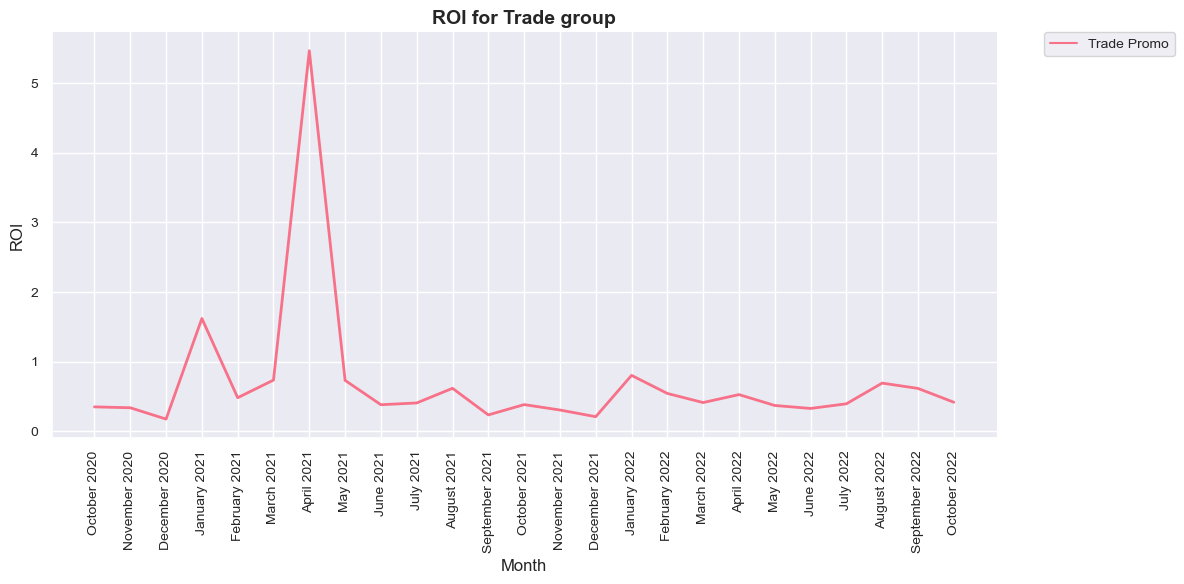

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_trade, markers=True, palette='husl', linewidth=2)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('ROI for Trade group', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

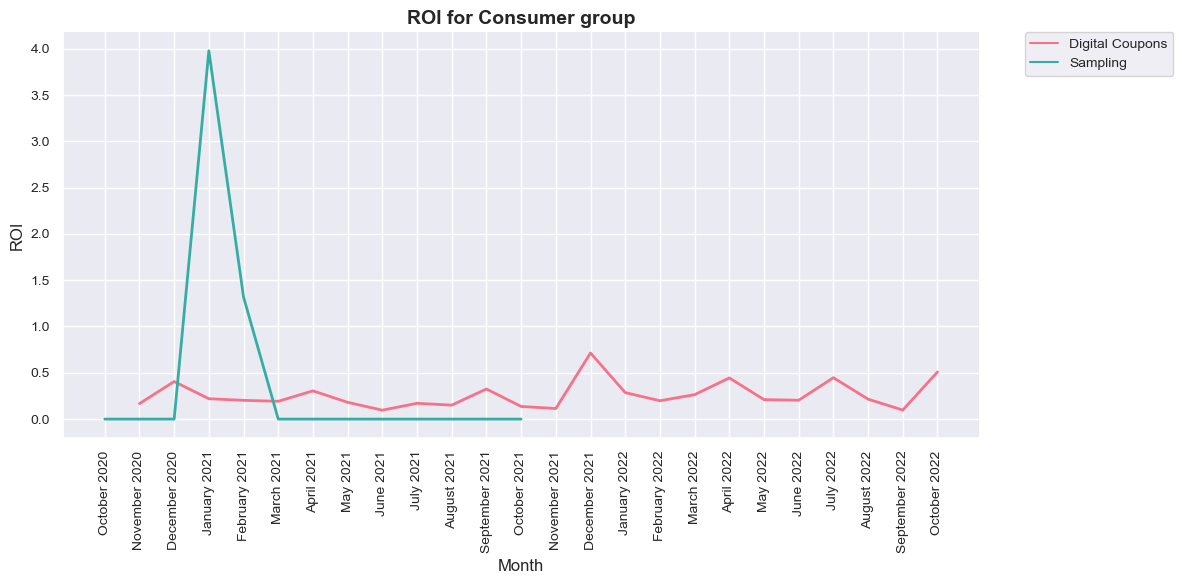

In [61]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_consumer, markers=True, palette='husl', linewidth=2)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('ROI for Consumer group', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [62]:
roi_media.groupby(['year','month_name','Tactic'])['ROI'].sum().reset_index()

,year,month_name,Tactic,ROI
0,2020,January,Amazon Display,0.0
1,2020,January,Amazon Search,0.0
2,2020,January,Digital Display,0.0
3,2020,January,Ecomm: Retail Display,0.0
4,2020,January,Ecomm: Search,0.0
...,...,...,...,...
535,2022,December,Paid Search: Pinterest,0.0
536,2022,December,Paid Social: Meta,0.0
537,2022,December,Paid Social: Pinterest,0.0
538,2022,December,Paid Social: Twitter,0.0


In [63]:
media_df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
5,Digital Display,Media,Digital Display,43.251484,1.843165e+06,110589.919000,95935.876380,October,2020,10,4
8,Ecomm: Retail Display - Dollar General,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
9,Ecomm: Retail Display - Target,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3108,Paid Social: Meta,Media,Paid Social: Meta,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3109,Paid Social: Pinterest,Media,Paid Social: Pinterest,0.000375,9.684746e+02,58.108474,1.850603,October,2022,10,4
3110,Paid Social: Twitter,Media,Paid Social: Twitter,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3111,PR,Media,PR,0.241373,1.392311e+04,835.386808,115909.615500,October,2022,10,4


In [64]:
media_df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
5,Digital Display,Media,Digital Display,43.251484,1.843165e+06,110589.919000,95935.876380,October,2020,10,4
8,Ecomm: Retail Display - Dollar General,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
9,Ecomm: Retail Display - Target,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3108,Paid Social: Meta,Media,Paid Social: Meta,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3109,Paid Social: Pinterest,Media,Paid Social: Pinterest,0.000375,9.684746e+02,58.108474,1.850603,October,2022,10,4
3110,Paid Social: Twitter,Media,Paid Social: Twitter,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3111,PR,Media,PR,0.241373,1.392311e+04,835.386808,115909.615500,October,2022,10,4


In [116]:
all_roi = pd.concat([roi_base,roi_media,roi_consumer,roi_trade])

In [117]:
all_roi

,Tactic,month_name,year,ROI,month_year
0,COVID,October,2020,-inf,October 2020
1,Competitive,October,2020,inf,October 2020
2,Core/Base,October,2020,inf,October 2020
3,Distribution,October,2020,inf,October 2020
4,New Subscribe & Save,October,2020,inf,October 2020
...,...,...,...,...,...
20,Trade Promo,June,2022,0.329197,June 2022
21,Trade Promo,July,2022,0.396017,July 2022
22,Trade Promo,August,2022,0.693354,August 2022
23,Trade Promo,September,2022,0.616870,September 2022


# SEASONAL TRENDS IN SALES ACCORDING TO TACTICS

# Summary Group- Base- Quarter

In [65]:
roi_base['Tactic'].unique()

array(['COVID', 'Competitive', 'Core/Base', 'Distribution',
       'New Subscribe & Save', 'Price', 'Seasonality', 'Trend', 'VPC'],
      dtype=object)

In [66]:
base_df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
2,Competitive,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4
3,Core/Base,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4
4,COVID,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4
7,Distribution,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4
13,New Subscribe & Save,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3103,New Subscribe & Save,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,October,2022,10,4
3112,Price,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,October,2022,10,4
3115,Seasonality,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,October,2022,10,4
3117,Trend,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,October,2022,10,4


In [67]:
#base_df = base_df.drop('Return_On_Sales',axis=1)
base_df = base_df.drop('Event',axis=1)

In [68]:
base_df.head()

,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
2,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4
3,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4
4,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4
7,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4
13,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4


In [224]:
base_quarter = base_df.groupby(['quarter','Tactic','year'])['Sales Volume'].sum().reset_index()

In [225]:
base_quarter['year_quarter'] = base_quarter['year'].astype(str) + '-Q' + base_quarter['quarter'].astype(str)

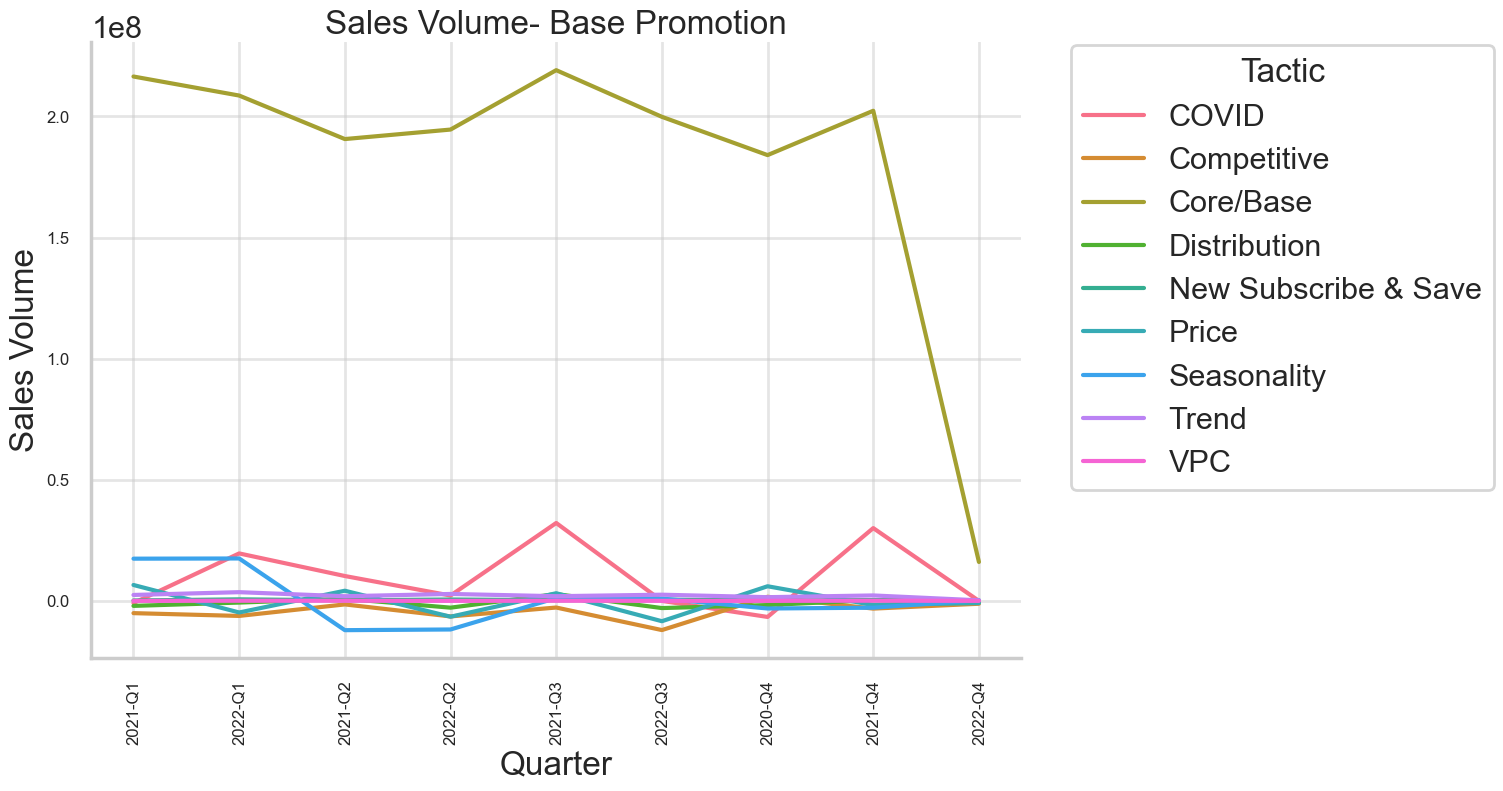

In [227]:
sns.set_style("whitegrid")
sns.set_context("poster")

palette = sns.color_palette("husl", n_colors=len(base_quarter['Tactic'].unique()))

plt.figure(figsize=(12, 8))
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=base_quarter, palette=palette)
plt.title('Sales Volume- Base Promotion')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1)

sns.despine(top=True, right=True)

plt.grid(axis='both', alpha=0.5)

plt.show()

In [71]:
media_df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
5,Digital Display,Media,Digital Display,43.251484,1.843165e+06,110589.919000,95935.876380,October,2020,10,4
8,Ecomm: Retail Display - Dollar General,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
9,Ecomm: Retail Display - Target,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3108,Paid Social: Meta,Media,Paid Social: Meta,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3109,Paid Social: Pinterest,Media,Paid Social: Pinterest,0.000375,9.684746e+02,58.108474,1.850603,October,2022,10,4
3110,Paid Social: Twitter,Media,Paid Social: Twitter,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3111,PR,Media,PR,0.241373,1.392311e+04,835.386808,115909.615500,October,2022,10,4


In [221]:
media_quarter = media_df.groupby(['quarter','Tactic','year'])['Sales Volume'].sum().reset_index()

In [222]:
media_quarter['year_quarter'] = media_quarter['year'].astype(str) + '-Q' + media_quarter['quarter'].astype(str)

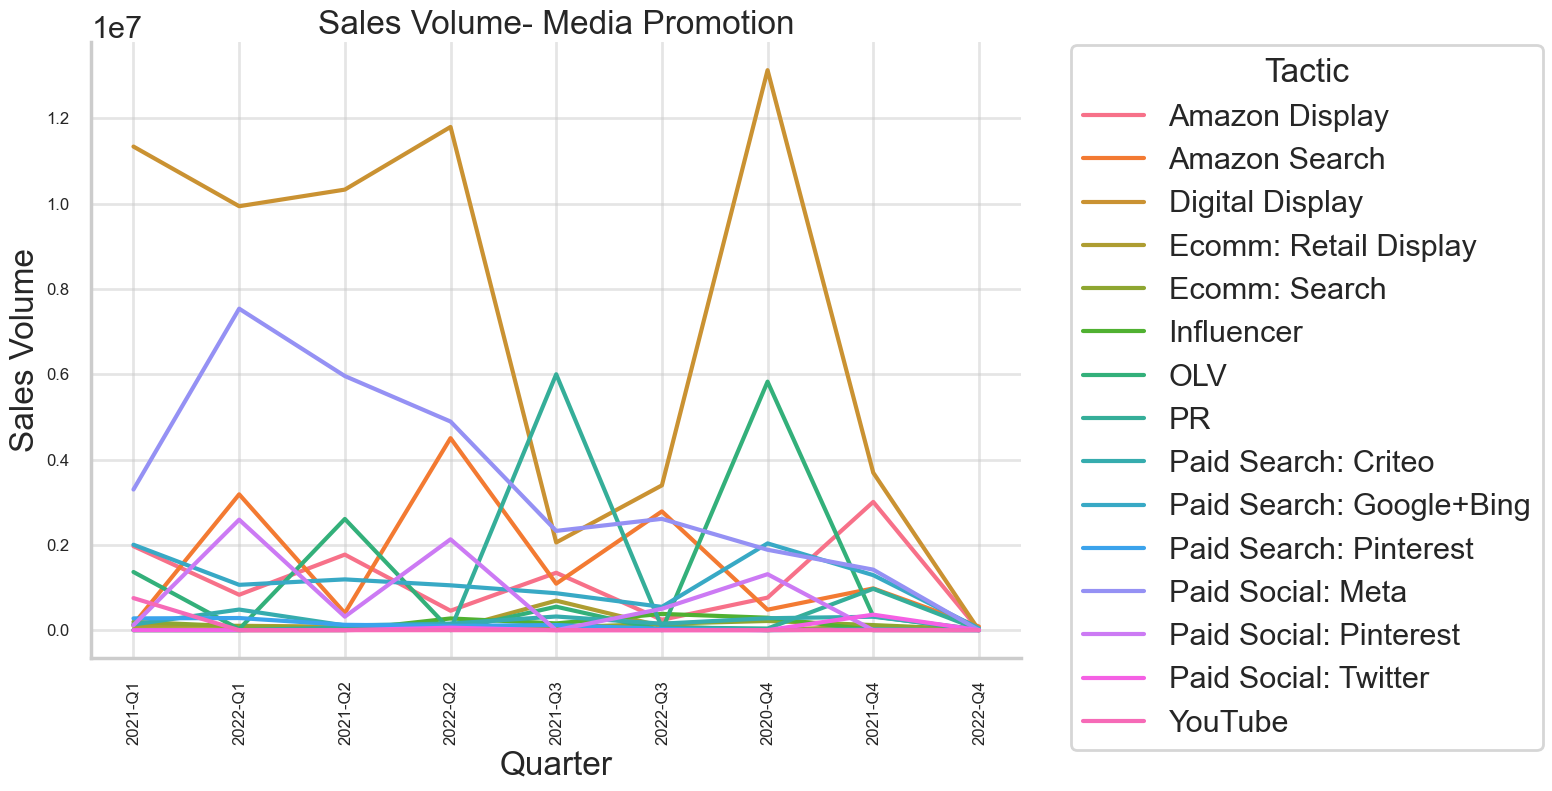

In [223]:
sns.set_style("whitegrid")
sns.set_context("poster")

palette = sns.color_palette("husl", n_colors=len(media_quarter['Tactic'].unique()))

plt.figure(figsize=(12, 8))
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=media_quarter, palette=palette)
plt.title('Sales Volume- Media Promotion')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1)

sns.despine(top=True, right=True)

plt.grid(axis='both', alpha=0.5)

plt.show()

# Summary Group- Trade Quarter

In [216]:
trade_quarter = trade_df.groupby(['quarter','Tactic','year'])['Sales Volume'].sum().reset_index()

In [217]:
trade_quarter['year_quarter'] = trade_quarter['year'].astype(str) + '-Q' + trade_quarter['quarter'].astype(str)

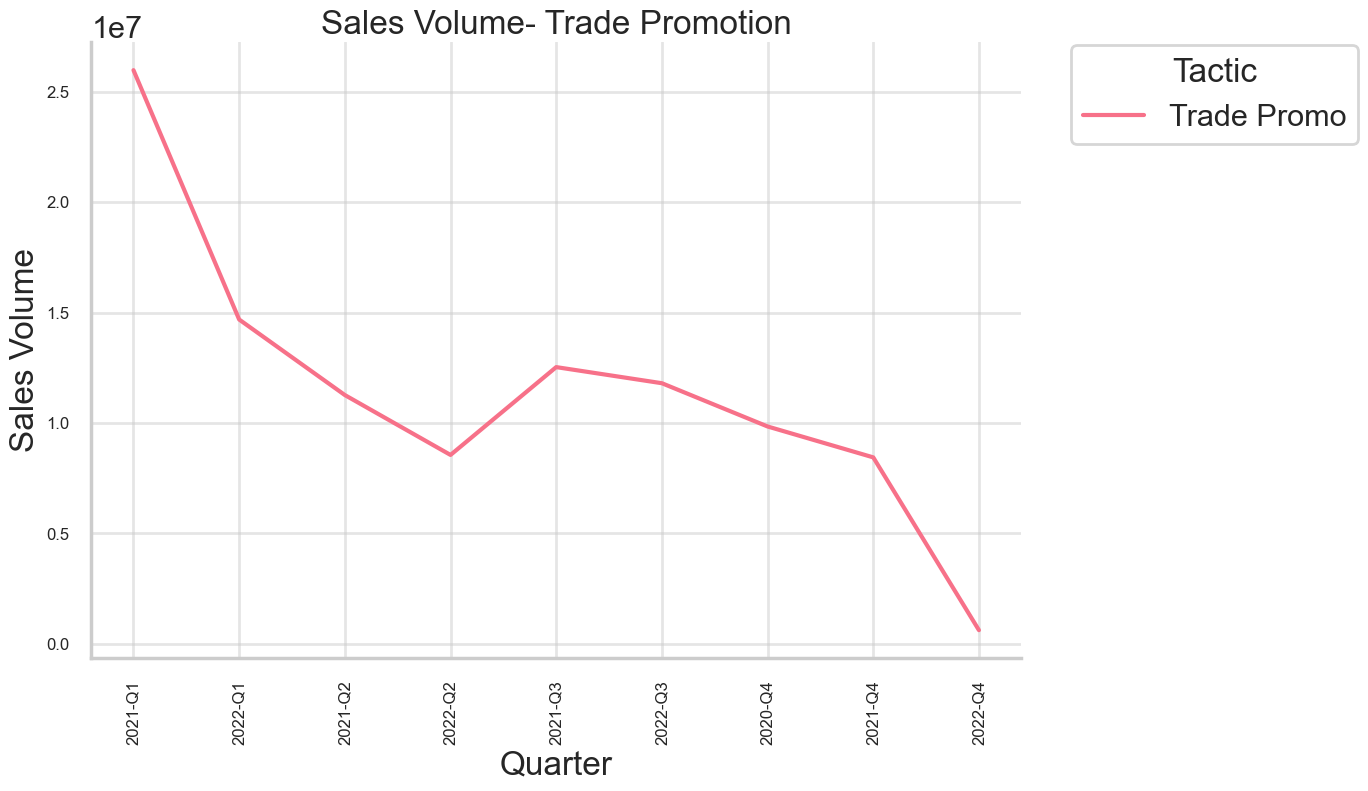

In [219]:
sns.set_style("whitegrid")
sns.set_context("poster")

palette = sns.color_palette("husl", n_colors=len(trade_quarter['Tactic'].unique()))

plt.figure(figsize=(12, 8))
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=trade_quarter, palette=palette)
plt.title('Sales Volume- Trade Promotion')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1)

sns.despine(top=True, right=True)

plt.grid(axis='both', alpha=0.5)

plt.show()

# Summary Group- Consumer Quarter

In [76]:
consumer_quarter = consumer_promo_df.groupby(['quarter','Tactic','year'])['Sales Volume'].sum().reset_index()

In [207]:
consumer_quarter['year_quarter'] = consumer_quarter['year'].astype(str) + '-Q' + consumer_quarter['quarter'].astype(str)

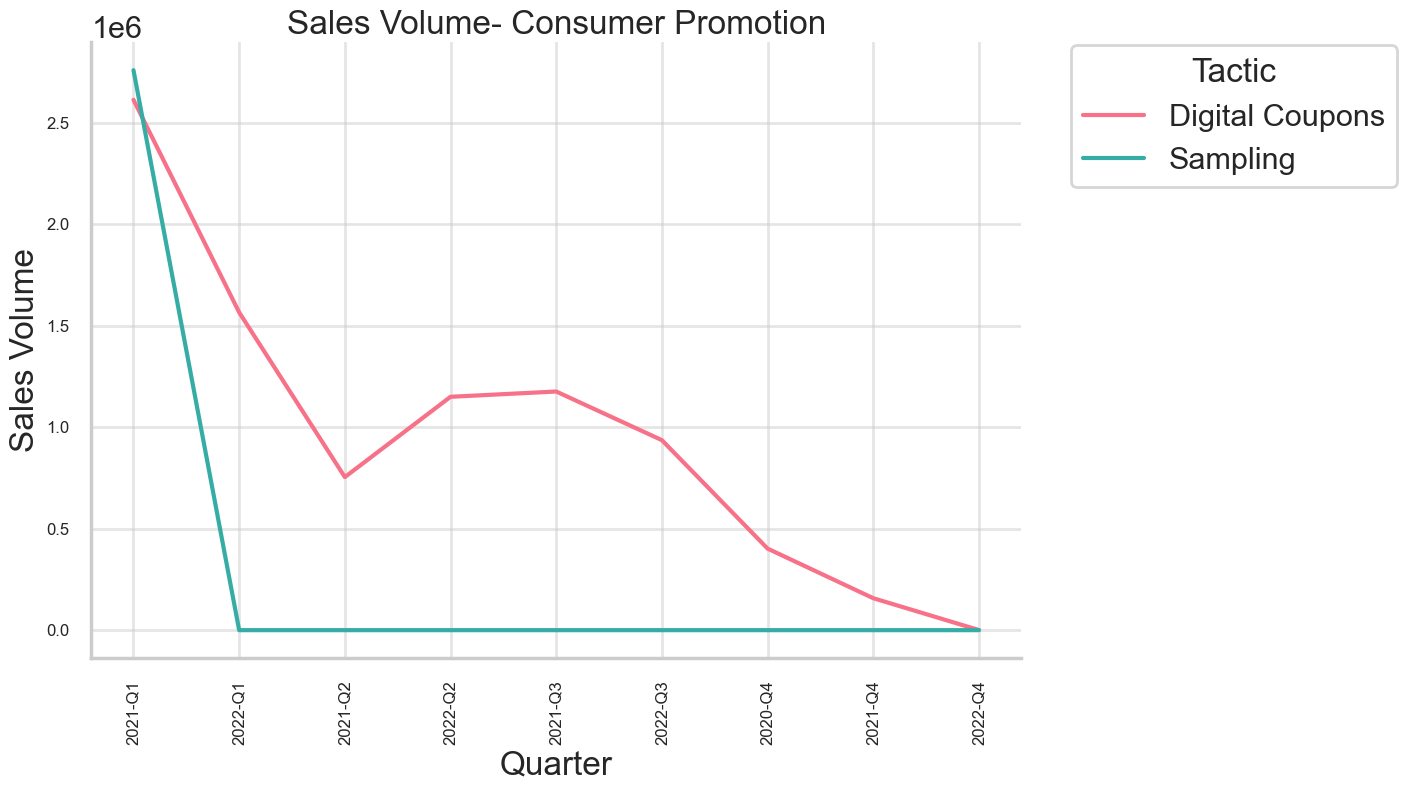

In [211]:
sns.set_style("whitegrid")
sns.set_context("poster")

palette = sns.color_palette("husl", n_colors=len(consumer_quarter['Tactic'].unique()))

plt.figure(figsize=(12, 8))
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=consumer_quarter, palette=palette)
plt.title('Sales Volume- Consumer Promotion')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1)

sns.despine(top=True, right=True)

plt.grid(axis='both', alpha=0.5)

plt.show()

# Finding which Tactic did best in which quarter of what year

In [78]:
all_quarter = pd.concat([base_quarter, media_quarter,trade_quarter,consumer_quarter])

In [79]:
all_quarter_1 = all_quarter.groupby(['Tactic','quarter','year'])['Sales Volume'].max().reset_index().sort_values('Sales Volume',ascending=False)
all_quarter_1.head(10)

,Tactic,quarter,year,Sales Volume
40,Core/Base,3,2021,2.191015e+08
36,Core/Base,1,2021,2.164798e+08
37,Core/Base,1,2022,2.086243e+08
43,Core/Base,4,2021,2.023400e+08
41,Core/Base,3,2022,1.998402e+08
39,Core/Base,2,2022,1.945809e+08
38,Core/Base,2,2021,1.906581e+08
42,Core/Base,4,2020,1.840352e+08
22,COVID,3,2021,3.216106e+07
25,COVID,4,2021,3.005243e+07


In [80]:
all_quarter_1['year_quarter'] = all_quarter_1['year'].astype(str) + '-Q' + all_quarter_1['quarter'].astype(str)
all_quarter_1 = all_quarter_1.sort_values(by=['year','quarter'])
all_quarter_1.head(35)

,Tactic,quarter,year,Sales Volume,year_quarter
42,Core/Base,4,2020,1.840352e+08,2020-Q4
60,Digital Display,4,2020,1.312841e+07,2020-Q4
213,Trade Promo,4,2020,9.840598e+06,2020-Q4
186,Price,4,2020,6.035220e+06,2020-Q4
114,OLV,4,2020,5.825821e+06,2020-Q4
141,Paid Search: Google+Bing,4,2020,2.034314e+06,2020-Q4
159,Paid Social: Meta,4,2020,1.884990e+06,2020-Q4
33,Competitive,4,2020,1.695248e+06,2020-Q4
222,Trend,4,2020,1.526626e+06,2020-Q4
168,Paid Social: Pinterest,4,2020,1.312147e+06,2020-Q4


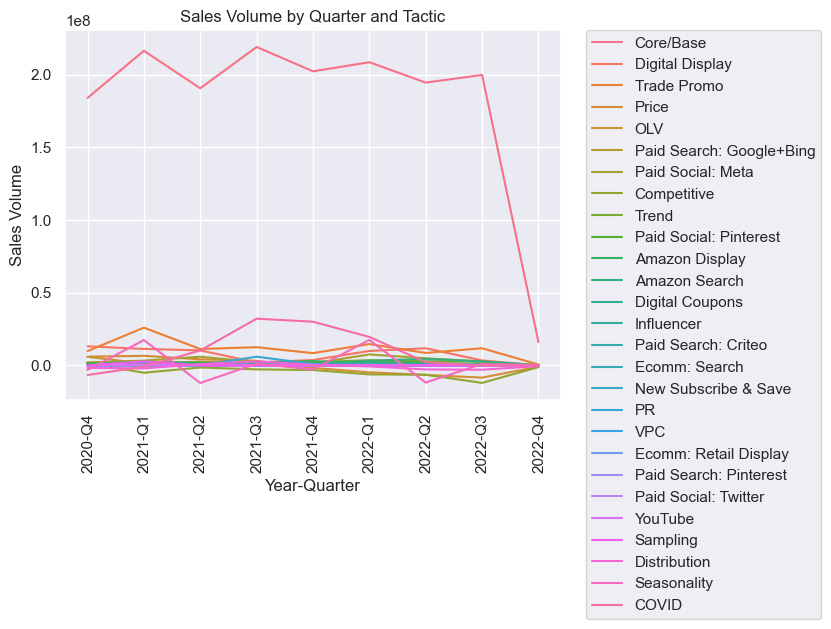

In [81]:
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=all_quarter_1)
plt.title('Sales Volume by Quarter and Tactic')
plt.xlabel('Year-Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

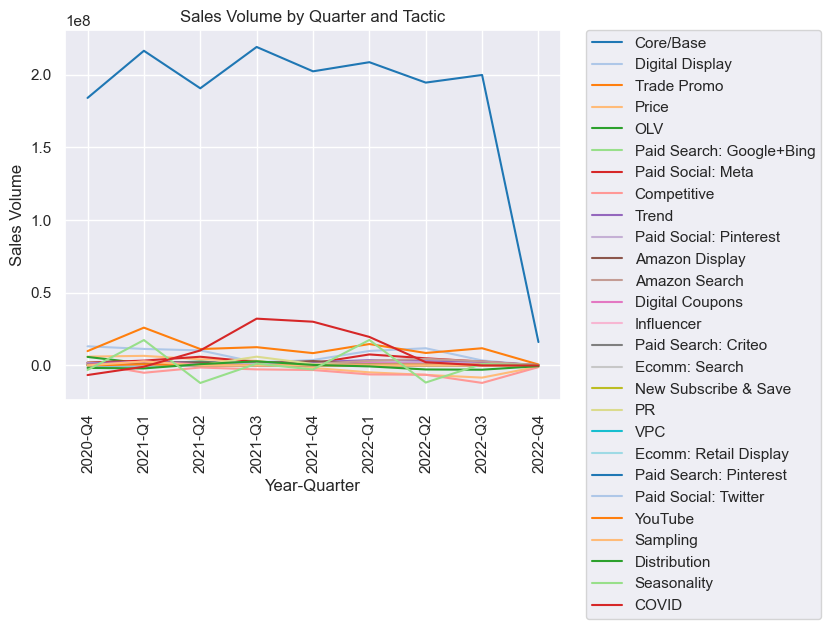

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color palette with different shades of blue
colors = sns.color_palette("tab20", n_colors=len(all_quarter_1['Tactic'].unique()))

# Plot the lineplot with different shades for each Tactic
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=all_quarter_1, palette=colors)

# Set the title, axis labels, and legend
plt.title('Sales Volume by Quarter and Tactic')
plt.xlabel('Year-Quarter')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


In [83]:
df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\1330380882.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')


,quarter,year,Tactic,Spend,Sales Volume,Profit
176,4,2020,Paid Search: Criteo,22664.410233,2.796845e+05,16781.068885
164,4,2020,COVID,0.000000,-6.629413e+06,-397764.788350
188,4,2020,YouTube,0.000000,0.000000e+00,0.000000
187,4,2020,VPC,0.000000,1.257088e+04,754.252610
186,4,2020,Trend,0.000000,1.526626e+06,91597.534195
...,...,...,...,...,...,...
145,3,2022,Influencer,66066.122937,3.811836e+05,22871.016813
144,3,2022,Ecomm: Search,273012.039470,1.511859e+05,9071.151951
143,3,2022,Ecomm: Retail Display,111999.082212,9.229558e+04,5537.734506
157,3,2022,Seasonality,0.000000,9.603249e+05,57619.495803


In [84]:
track_low_media= media_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\3805354114.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  track_low_media= media_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')


In [85]:
track_low_base = base_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\1544747003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  track_low_base = base_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')


In [86]:
track_low_consumer= consumer_promo_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\4049855156.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  track_low_consumer= consumer_promo_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')


In [87]:
track_low_trade= trade_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\2571874400.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  track_low_trade= trade_df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values('year')


In [88]:
track_low_trade

,quarter,year,Tactic,Spend,Sales Volume,Profit
6,4,2020,Trade Promo,2.215404e+06,9.840598e+06,5.904359e+05
0,1,2021,Trade Promo,1.731692e+06,2.597377e+07,1.558426e+06
2,2,2021,Trade Promo,8.786200e+05,1.126370e+07,6.758218e+05
4,3,2021,Trade Promo,1.997392e+06,1.252857e+07,7.517144e+05
7,4,2021,Trade Promo,1.776534e+06,8.441487e+06,5.064892e+05
1,1,2022,Trade Promo,1.438567e+06,1.468363e+07,8.810176e+05
3,2,2022,Trade Promo,1.263035e+06,8.551541e+06,5.130924e+05
5,3,2022,Trade Promo,1.280548e+06,1.179925e+07,7.079551e+05
8,4,2022,Trade Promo,8.855686e+04,6.178045e+05,3.706827e+04


In [89]:
track_low_trade.sort_values(['Spend', 'Sales Volume'], ascending=[False, True]).iloc[0]

quarter                    4
year                    2020
Tactic           Trade Promo
Spend           2215403.9336
Sales Volume    9840598.2233
Profit          590435.89335
Name: 6, dtype: object

In [90]:
track_low_trade.sort_values(['quarter','year','Spend', 'Profit'], ascending=[True,True,False,False])

,quarter,year,Tactic,Spend,Sales Volume,Profit
0,1,2021,Trade Promo,1.731692e+06,2.597377e+07,1.558426e+06
1,1,2022,Trade Promo,1.438567e+06,1.468363e+07,8.810176e+05
2,2,2021,Trade Promo,8.786200e+05,1.126370e+07,6.758218e+05
3,2,2022,Trade Promo,1.263035e+06,8.551541e+06,5.130924e+05
4,3,2021,Trade Promo,1.997392e+06,1.252857e+07,7.517144e+05
5,3,2022,Trade Promo,1.280548e+06,1.179925e+07,7.079551e+05
6,4,2020,Trade Promo,2.215404e+06,9.840598e+06,5.904359e+05
7,4,2021,Trade Promo,1.776534e+06,8.441487e+06,5.064892e+05
8,4,2022,Trade Promo,8.855686e+04,6.178045e+05,3.706827e+04


In [91]:
a1 = df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values(['quarter','year','Spend','Sales Volume','Profit'], ascending=[True,True,True,True,False])

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\2191017751.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a1 = df.groupby(['quarter','year','Tactic'])['Spend','Sales Volume','Profit'].sum().reset_index().sort_values(['quarter','year','Spend','Sales Volume','Profit'], ascending=[True,True,True,True,False])


In [92]:
#a1 = track_low_media.sort_values(['year','quarter','Spend','Profit'], ascending=[True,True,True,False]).reset_index()

In [93]:
a1

,quarter,year,Tactic,Spend,Sales Volume,Profit
3,1,2021,Competitive,0.000000,-5.060753e+06,-303645.195269
7,1,2021,Distribution,0.000000,-2.066839e+06,-124010.352671
2,1,2021,COVID,0.000000,-9.079145e+05,-54474.868551
10,1,2021,Influencer,0.000000,0.000000e+00,0.000000
19,1,2021,Paid Social: Twitter,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...
224,4,2022,Ecomm: Retail Display,5708.356036,5.861967e+03,351.718019
217,4,2022,Amazon Search,6155.792688,8.483755e+04,5090.253291
225,4,2022,Ecomm: Search,19427.606210,1.528252e+04,916.951380
239,4,2022,Trade Promo,88556.856510,6.178045e+05,37068.267690


In [94]:
# Select quarter 4 of year 2020
q4_2020 = a1[(a1['quarter'] == 4) & (a1['year'] == 2020)]

# Select all quarters of year 2021
q1_2021 = a1[(a1['quarter'] == 1) & (a1['year'] == 2021)]
q2_2021 = a1[(a1['quarter'] == 2) & (a1['year'] == 2021)]
q3_2021 = a1[(a1['quarter'] == 3) & (a1['year'] == 2021)]
q4_2021 = a1[(a1['quarter'] == 4) & (a1['year'] == 2021)]

# Select all quarters of year 2022
q1_2022 = a1[(a1['quarter'] == 1) & (a1['year'] == 2022)]
q2_2022 = a1[(a1['quarter'] == 2) & (a1['year'] == 2022)]
q3_2022 = a1[(a1['quarter'] == 3) & (a1['year'] == 2022)]
q4_2022 = a1[(a1['quarter'] == 4) & (a1['year'] == 2022)]


In [95]:
q4_2022

,quarter,year,Tactic,Spend,Sales Volume,Profit
219,4,2022,Competitive,0.000000,-1.182153e+06,-70929.178100
236,4,2022,Price,0.000000,-8.863422e+05,-53180.531040
223,4,2022,Distribution,0.000000,-5.114305e+05,-30685.827400
216,4,2022,Amazon Display,0.000000,0.000000e+00,0.000000
218,4,2022,COVID,0.000000,0.000000e+00,0.000000
226,4,2022,Influencer,0.000000,0.000000e+00,0.000000
228,4,2022,OLV,0.000000,0.000000e+00,0.000000
233,4,2022,Paid Social: Meta,0.000000,0.000000e+00,0.000000
235,4,2022,Paid Social: Twitter,0.000000,0.000000e+00,0.000000
237,4,2022,Sampling,0.000000,0.000000e+00,0.000000


# Summary Profit according to Tactic and Month

In [96]:
base_df

,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
2,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4
3,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4
4,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4
7,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4
13,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...
3103,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,October,2022,10,4
3112,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,October,2022,10,4
3115,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,October,2022,10,4
3117,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,October,2022,10,4


In [97]:
base_df['month_year'] = base_df['month_name'].astype(str) + base_df['year'].astype(str)
base_df

,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter,month_year
2,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4,October2020
3,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4,October2020
4,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4,October2020
7,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4,October2020
13,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4,October2020
...,...,...,...,...,...,...,...,...,...,...,...
3103,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,October,2022,10,4,October2022
3112,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,October,2022,10,4,October2022
3115,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,October,2022,10,4,October2022
3117,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,October,2022,10,4,October2022


In [98]:
base_profit_quarter = base_df.groupby(['quarter','year','Tactic'])['Profit'].sum().reset_index()
base_profit_quarter = base_profit_quarter.sort_values(by=['year','quarter'])
base_profit_quarter['year_quarter'] = base_profit_quarter['year'].astype(str) + '-Q' + base_profit_quarter['quarter'].astype(str)
base_profit_quarter.sort_values('Profit',ascending=False).head(10)

,quarter,year,Tactic,Profit,year_quarter
38,3,2021,Core/Base,1.314609e+07,2021-Q3
2,1,2021,Core/Base,1.298879e+07,2021-Q1
11,1,2022,Core/Base,1.251746e+07,2022-Q1
65,4,2021,Core/Base,1.214040e+07,2021-Q4
47,3,2022,Core/Base,1.199041e+07,2022-Q3
29,2,2022,Core/Base,1.167485e+07,2022-Q2
20,2,2021,Core/Base,1.143949e+07,2021-Q2
56,4,2020,Core/Base,1.104211e+07,2020-Q4
36,3,2021,COVID,1.929664e+06,2021-Q3
63,4,2021,COVID,1.803146e+06,2021-Q4


In [99]:
media_profit_quarter = media_df.groupby(['quarter','year','Tactic'])['Profit'].sum().reset_index()
media_profit_quarter = media_profit_quarter.sort_values(by=['year','quarter'])
media_profit_quarter['year_quarter'] = media_profit_quarter['year'].astype(str) + '-Q' + media_profit_quarter['quarter'].astype(str)
media_profit_quarter
result = media_profit_quarter.groupby(['year', 'quarter']).apply(lambda x: x.loc[x['Profit'].nlargest(1).index]['Tactic']).reset_index()
result

,year,quarter,level_2,Tactic
0,2020,4,92,Digital Display
1,2021,1,2,Digital Display
2,2021,2,32,Digital Display
3,2021,3,67,PR
4,2021,4,107,Digital Display
5,2022,1,17,Digital Display
6,2022,2,47,Digital Display
7,2022,3,77,Digital Display
8,2022,4,121,Amazon Search


In [100]:
trade_profit_quarter = trade_df.groupby(['quarter','year','Tactic'])['Profit'].sum().reset_index()
trade_profit_quarter = trade_profit_quarter.sort_values(by=['year','quarter'])
trade_profit_quarter['year_quarter'] = trade_profit_quarter['year'].astype(str) + '-Q' + trade_profit_quarter['quarter'].astype(str)
trade_profit_quarter
result = trade_profit_quarter.groupby(['year', 'quarter']).apply(lambda x: x.loc[x['Profit'].nlargest(1).index]['Tactic']).reset_index()
result

,year,quarter,level_2,Tactic
0,2020,4,6,Trade Promo
1,2021,1,0,Trade Promo
2,2021,2,2,Trade Promo
3,2021,3,4,Trade Promo
4,2021,4,7,Trade Promo
5,2022,1,1,Trade Promo
6,2022,2,3,Trade Promo
7,2022,3,5,Trade Promo
8,2022,4,8,Trade Promo


In [101]:
consumer_profit_quarter = consumer_promo_df.groupby(['quarter','year','Tactic'])['Profit'].sum().reset_index()
consumer_profit_quarter = consumer_profit_quarter.sort_values(by=['year','quarter'])
consumer_profit_quarter['year_quarter'] = consumer_profit_quarter['year'].astype(str) + '-Q' + consumer_profit_quarter['quarter'].astype(str)
consumer_profit_quarter
result = consumer_profit_quarter.groupby(['year', 'quarter']).apply(lambda x: x.loc[x['Profit'].nlargest(1).index]['Tactic']).reset_index()
result

,year,quarter,level_2,Tactic
0,2020,4,12,Digital Coupons
1,2021,1,1,Sampling
2,2021,2,4,Digital Coupons
3,2021,3,8,Digital Coupons
4,2021,4,14,Digital Coupons
5,2022,1,2,Digital Coupons
6,2022,2,6,Digital Coupons
7,2022,3,10,Digital Coupons
8,2022,4,16,Digital Coupons


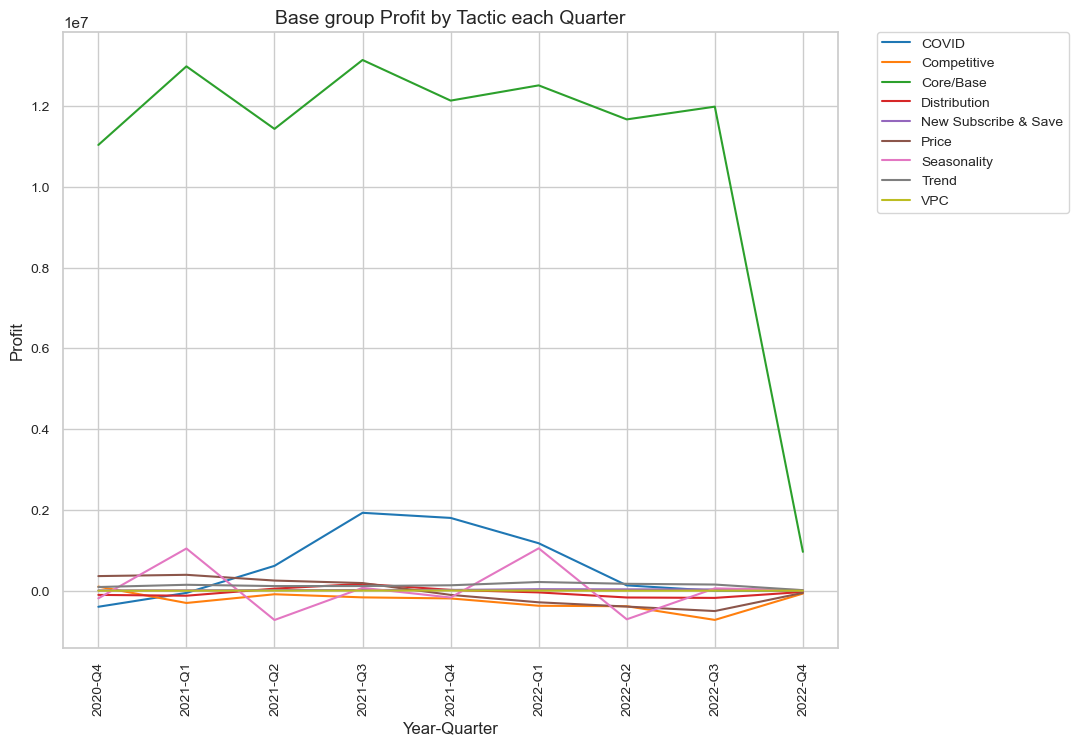

In [107]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
colors = sns.color_palette("tab10", n_colors=len(b['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=b, markers=True, palette=colors)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Base group Profit by Tactic each Quarter', fontsize=14)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
plt.show()

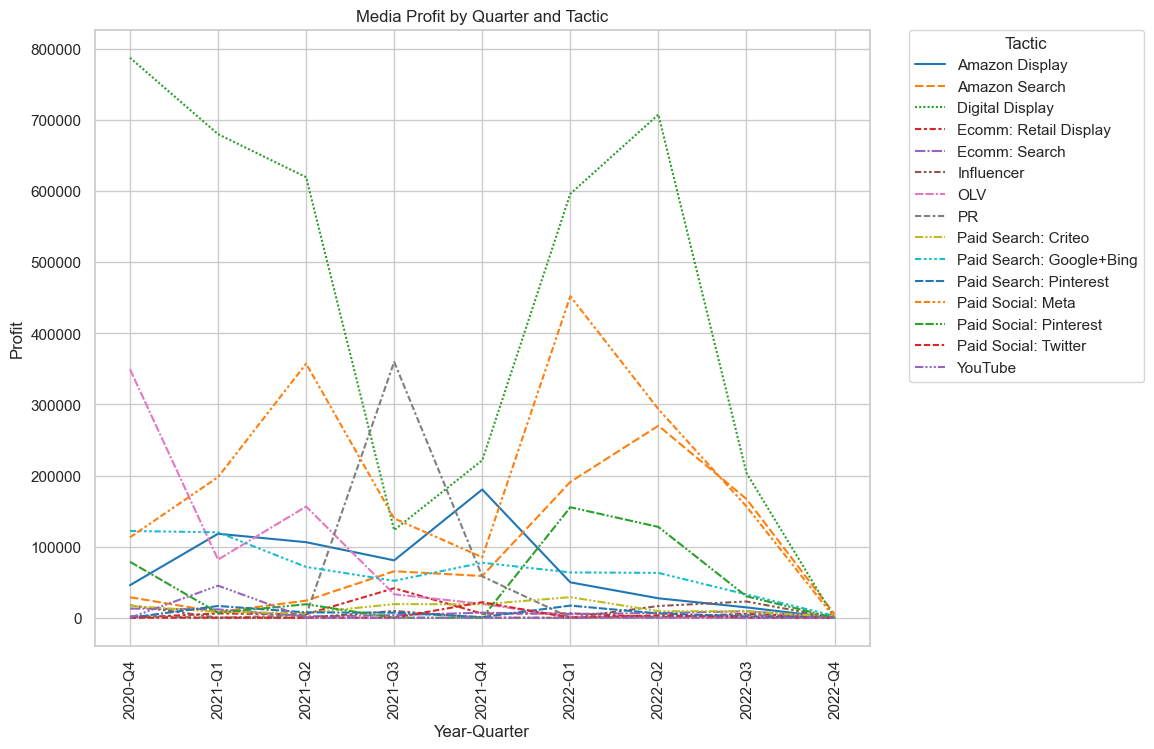

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette("tab10", n_colors=len(media_profit_quarter['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', style='Tactic', data=media_profit_quarter, palette=custom_palette)
plt.title('Media Profit by Quarter and Tactic')
plt.xlabel('Year-Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.legend(title='Tactic', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


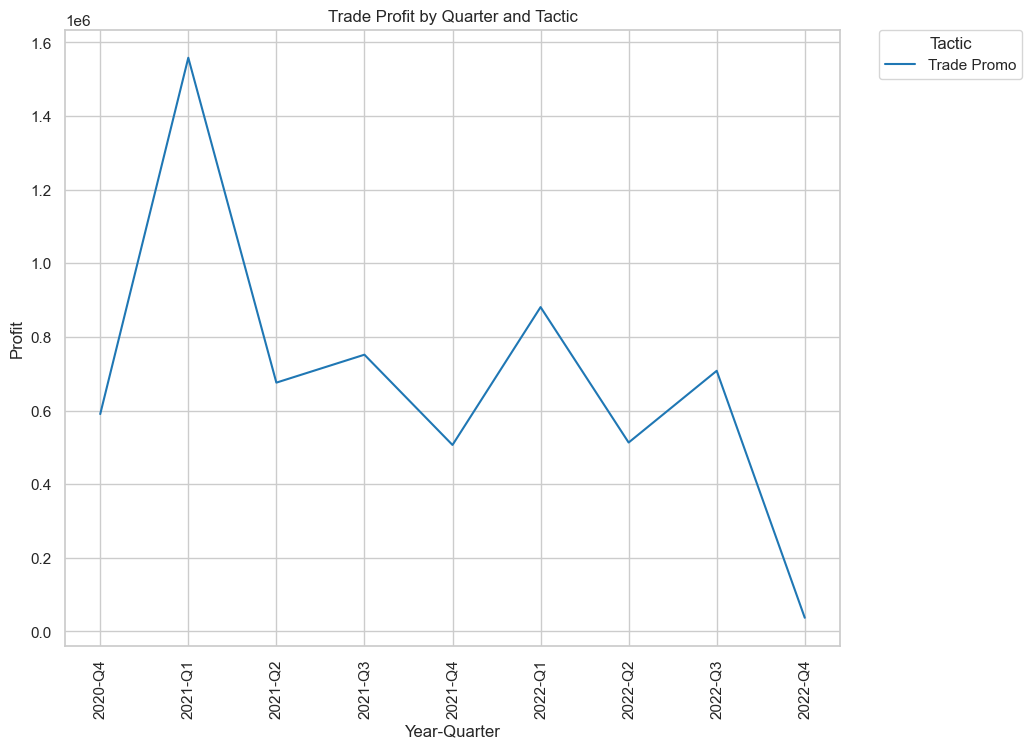

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette("tab10", n_colors=len(trade_profit_quarter['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', style='Tactic', data=trade_profit_quarter, palette=custom_palette)
plt.title('Trade Profit by Quarter and Tactic')
plt.xlabel('Year-Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.legend(title='Tactic', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


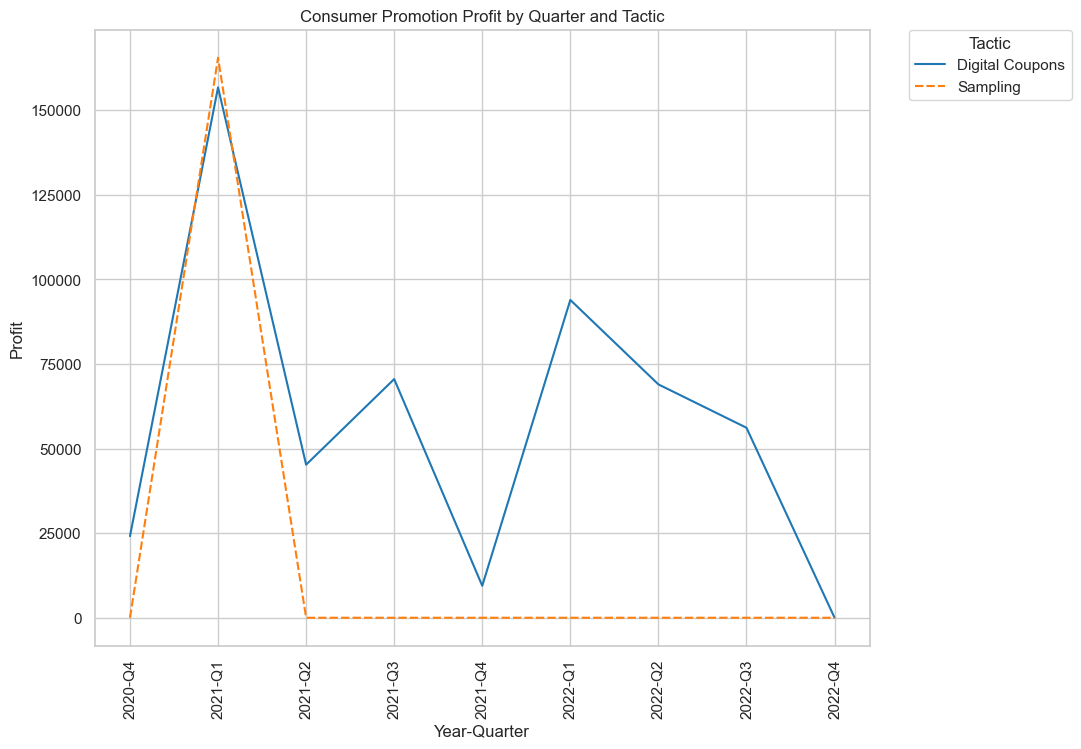

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette("tab10", n_colors=len(consumer_profit_quarter['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', style='Tactic', data=consumer_profit_quarter, palette=custom_palette)
plt.title('Consumer Promotion Profit by Quarter and Tactic')
plt.xlabel('Year-Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.legend(title='Tactic', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# More Spend should have more Sales Volume

In [ ]:
df.head()

In [ ]:
summary_sv_spend = df.groupby(['Summary Group','Tactic'])['Spend'].sum().reset_index()
summary_sv_spend

In [ ]:
summary_sv_spend_1 = df.groupby(['Summary Group','Tactic'])['Profit'].sum().reset_index()
summary_sv_spend_1

In [ ]:
summary_sv_spend_2 = df.groupby(['Summary Group','Tactic'])['Sales Volume'].sum().reset_index()
summary_sv_spend_2

In [ ]:
rel_df = summary_sv_spend.merge(summary_sv_spend_1)
rel_df = rel_df.merge(summary_sv_spend_2)

In [ ]:
rel_df.sort_values(by=['Spend','Sales Volume','Profit'], ascending=[False,True,True])

In [ ]:
rel_df['Tactic'].unique()

In [ ]:
rel_df_base = rel_df[rel_df['Summary Group']=='Base']
rel_df_media = rel_df[rel_df['Summary Group']=='Media']
rel_df_trade = rel_df[rel_df['Summary Group']=='Trade']
rel_df_consumer = rel_df[rel_df['Summary Group']=='ConsumerPromotion']
rel_df_base

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Tactic and aggregate the Spend, Profit and Sales Volume columns
tactic_df = rel_df.groupby("Tactic").agg({"Spend": "sum", "Profit": "sum", "Sales Volume": "sum"})

# Create a bar chart
tactic_df.plot(kind="bar", rot=0, title="Marketing Metrics by Tactic",figsize=(10,6))

# Set the axis labels
plt.xlabel("Tactic")
plt.ylabel("Amount")
plt.xticks(rotation=90)
# Display the plot
plt.show()


In [137]:
roi_trade

,Tactic,month_name,year,ROI,month_year
0,Trade Promo,October,2020,0.351949,October 2020
1,Trade Promo,November,2020,0.339202,November 2020
2,Trade Promo,December,2020,0.176602,December 2020
3,Trade Promo,January,2021,1.621122,January 2021
4,Trade Promo,February,2021,0.483557,February 2021
5,Trade Promo,March,2021,0.736482,March 2021
6,Trade Promo,April,2021,5.465545,April 2021
7,Trade Promo,May,2021,0.732515,May 2021
8,Trade Promo,June,2021,0.382789,June 2021
9,Trade Promo,July,2021,0.408231,July 2021


In [140]:
cba_media

In [147]:
roi_media

,Tactic,month_name,year,quarter,ROI
0,Amazon Display,April,2021,2,0.287506
1,Amazon Display,April,2022,2,0.164472
2,Amazon Display,August,2021,3,0.277675
3,Amazon Display,August,2022,3,0.157349
4,Amazon Display,December,2020,4,0.275619
...,...,...,...,...,...
370,YouTube,October,2020,4,NaN
371,YouTube,October,2021,4,NaN
372,YouTube,October,2022,4,NaN
373,YouTube,September,2021,3,NaN


In [148]:
all_roi_ = pd.concat([roi_base,roi_media,roi_trade,roi_consumer])

In [150]:
all_roi.sort_values('ROI',ascending=False)

,Tactic,month_name,year,ROI,month_year
153,COVID,March,2022,inf,March 2022
150,Seasonality,February,2022,inf,February 2022
98,VPC,August,2021,inf,August 2021
99,COVID,September,2021,inf,September 2021
182,Core/Base,June,2022,inf,June 2022
...,...,...,...,...,...
41,Sampling,June,2022,NaN,June 2022
43,Sampling,July,2022,NaN,July 2022
45,Sampling,August,2022,NaN,August 2022
47,Sampling,September,2022,NaN,September 2022


In [159]:
c = roi_consumer.groupby(["Tactic"])['ROI'].sum()

In [160]:
t = roi_trade.groupby(["Tactic"])['ROI'].sum()

In [161]:
m = roi_media.groupby(["Tactic"])['ROI'].sum()

In [162]:
b = roi_base.groupby(["Tactic"])['ROI'].sum()

In [163]:
all_ = df.groupby(['Tactic'])['Spend'].sum()

In [166]:
ctmb = pd.concat([c,t,m,b])

In [170]:
ctmb = pd.DataFrame(ctmb)

In [172]:
all_ = pd.DataFrame(all_)

In [174]:
merged = ctmb.merge(all_,on='Tactic')

In [180]:
merged.reset_index()

,Tactic,ROI,Spend
0,Digital Coupons,6.254566,2.356325e+06
1,Sampling,5.296670,3.420000e+05
2,Trade Promo,17.572334,1.267035e+07
3,Amazon Display,6.318435,2.068249e+06
4,Amazon Search,12.510184,1.290513e+06
5,Digital Display,26.599072,3.477808e+06
6,Ecomm: Retail Display,1.826856,6.910451e+05
7,Ecomm: Search,1.193783,1.419188e+06
8,Influencer,2.577626,3.118630e+05
9,OLV,11.769345,6.760363e+05


In [194]:
merged.reset_index()

,Tactic,ROI,Spend
0,Digital Coupons,6.254566,2.356325e+06
1,Sampling,5.296670,3.420000e+05
2,Trade Promo,17.572334,1.267035e+07
3,Amazon Display,6.318435,2.068249e+06
4,Amazon Search,12.510184,1.290513e+06
5,Digital Display,26.599072,3.477808e+06
6,Ecomm: Retail Display,1.826856,6.910451e+05
7,Ecomm: Search,1.193783,1.419188e+06
8,Influencer,2.577626,3.118630e+05
9,OLV,11.769345,6.760363e+05


In [195]:
merged.columns

Index(['ROI', 'Spend'], dtype='object')

In [198]:
merged.sort_values(['Spend','ROI'],ascending = [False,True])

,ROI,Spend
Tactic,,
Trade Promo,17.572334,1.267035e+07
Digital Display,26.599072,3.477808e+06
Digital Coupons,6.254566,2.356325e+06
Paid Social: Meta,18.499242,2.285946e+06
Amazon Display,6.318435,2.068249e+06
PR,31.016679,1.601364e+06
Ecomm: Search,1.193783,1.419188e+06
Amazon Search,12.510184,1.290513e+06
Paid Search: Google+Bing,12.709207,1.283963e+06


In [199]:
merged.describe()

,ROI,Spend
count,18.000000,2.700000e+01
mean,11.648376,1.189816e+06
std,11.532088,2.475385e+06
min,0.457390,0.000000e+00
25%,2.669104,0.000000e+00
50%,8.273171,3.315290e+05
75%,16.356553,1.354850e+06
max,41.152087,1.267035e+07


In [202]:
new = df.groupby(['Tactic'])

In [204]:
df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
2,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,10,4
3,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,10,4
4,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...
3115,Seasonality,Base,Seasonality,0.000000,2.634118e+05,15804.705870,0.000000,October,2022,10,4
3116,Trade Promo,Trade,Trade Promo,0.000000,6.178045e+05,37068.267690,88556.856510,October,2022,10,4
3117,Trend,Base,Trend,0.000000,2.246527e+05,13479.160410,0.000000,October,2022,10,4
3118,VPC,Base,VPC,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4


C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\3634353731.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(consumer_quarter['year_quarter'].unique(), rotation=90, fontsize=12)
C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\3634353731.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)


ValueError: Could not interpret value `month_year` for parameter `x`

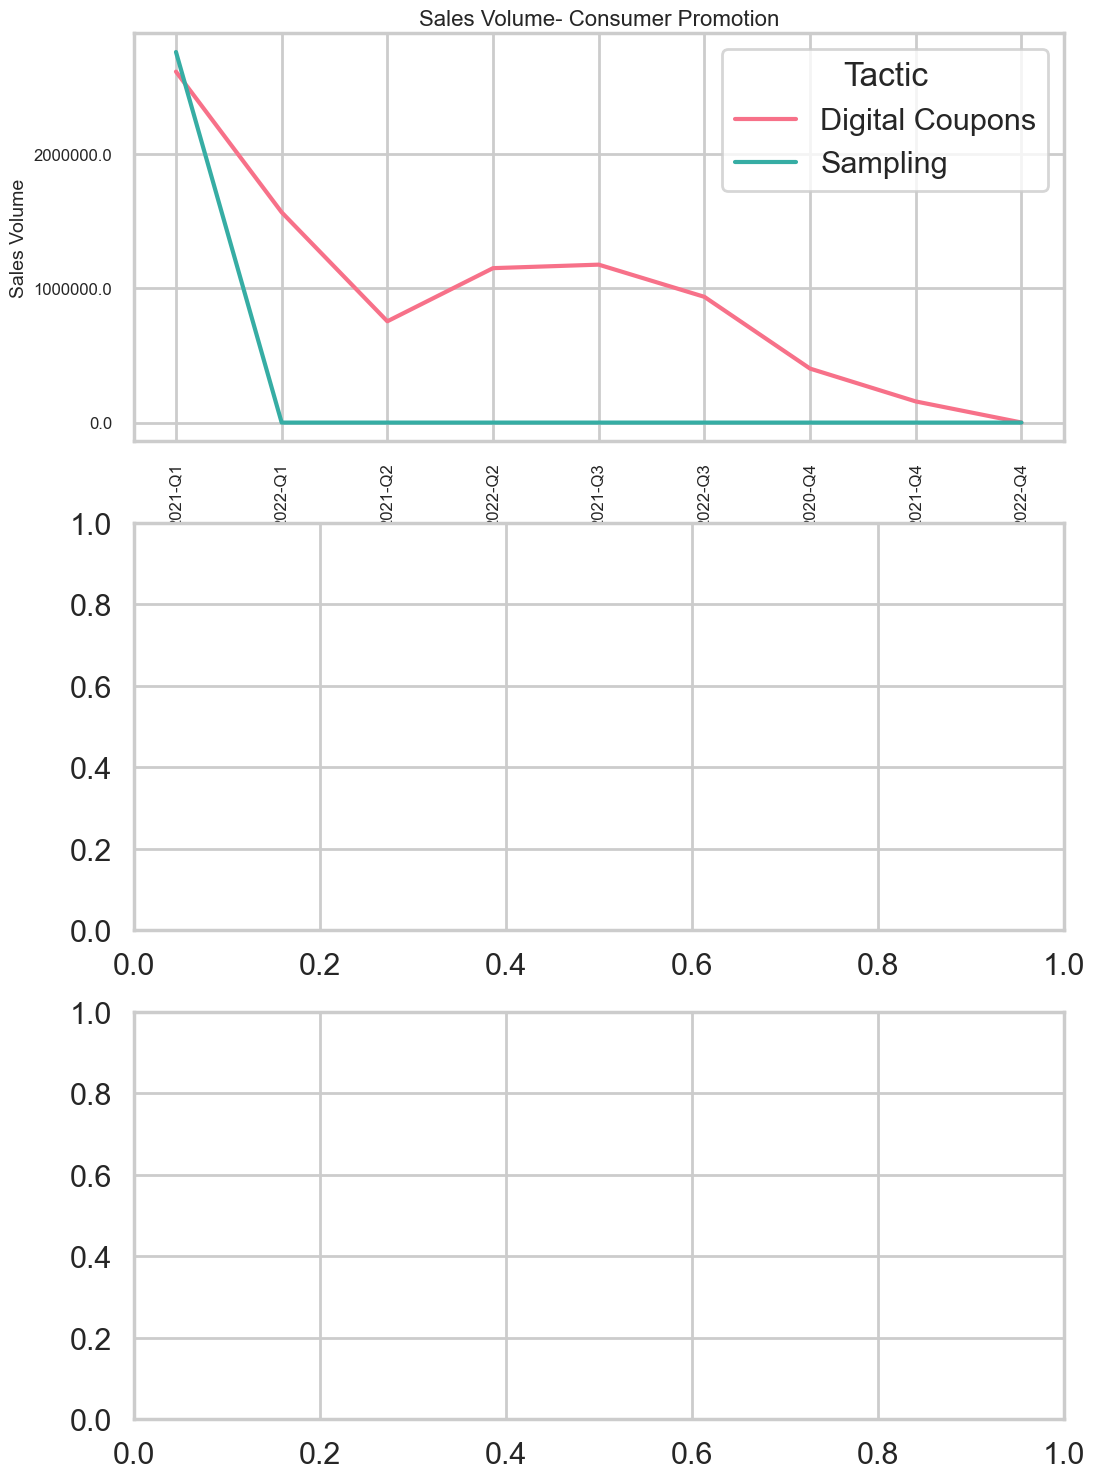

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style("whitegrid")
sns.set_context("poster")

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(12, 18))

# Graph 1 - Sales Volume by Quarter and Tactic - Consumer Promotion
palette1 = sns.color_palette("husl", n_colors=len(consumer_quarter['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=consumer_quarter, palette=palette1, ax=ax1)
ax1.set_title('Sales Volume- Consumer Promotion', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Sales Volume', fontsize=14)
ax1.set_xticklabels(consumer_quarter['year_quarter'].unique(), rotation=90, fontsize=12)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)

# Graph 2 - ROI for Consumer group
palette2 = sns.color_palette("husl", n_colors=len(roi_consumer['Tactic'].unique()))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_consumer, markers=True, palette=palette2, linewidth=2, ax=ax2)
ax2.set_title('ROI for Consumer group', fontsize=16)
ax2.set_xlabel('Month', fontsize=14)
ax2.set_ylabel('ROI', fontsize=14)
ax2.set_xticklabels(roi_consumer['month_year'].unique(), rotation=90, fontsize=12)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)

# Graph 3 - Consumer Promotion Profit by Quarter and Tactic
palette3 = sns.color_palette("tab10", n_colors=len(consumer_profit_quarter['Tactic'].unique()))
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', style='Tactic', data=consumer_profit_quarter, palette=palette3, ax=ax3)
ax3.set_title('Consumer Promotion Profit by Quarter and Tactic', fontsize=16)
ax3.set_xlabel('Year-Quarter', fontsize=14)
ax3.set_ylabel('Profit', fontsize=14)
ax3.set_xticklabels(consumer_profit_quarter['year_quarter'].unique(), rotation=90, fontsize=12)
ax3.set_yticklabels(ax3.get_yticks(), fontsize=12)

# Add legend outside of the plot
ax1.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1, fontsize=12)
ax2.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1, fontsize=12)
ax3.legend(title="Tactic", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.1, fontsize=12)

# Remove top and right spines
sns.despine(top=True, right=True, ax=ax1)
sns.despine(top=True, right=True, ax=ax2)
sns.despine(top=True, right=True, ax=ax3)

# Add gridlines to x and y axes
ax1.grid(axis='both', alpha=0.5)
ax2.grid(axis='both', alpha=0.5)
ax3.grid(axis='both', alpha=0.5)

# Adjust spacing between subplots


In [237]:
media_df = media_df[['Summary Group','Tactic','Sales Volume','Profit','Spend','month_name','year','quarter']]
consumer_promo_df = consumer_promo_df[['Summary Group','Tactic','Sales Volume','Profit','Spend','month_name','year','quarter']]
trade_df = trade_df[['Summary Group','Tactic','Sales Volume','Profit','Spend','month_name','year','quarter']]
base_df = base_df[['Summary Group','Tactic','Sales Volume','Profit','Spend','month_name','year','quarter']]

In [283]:
media_df['year_quarter'] = media_df['year'].astype(str) + '-Q' + media_df['quarter'].astype(str)

In [284]:
m1= media_df.groupby(['year','quarter','Tactic'])['Profit'].sum().reset_index()
m1['year_quarter'] = m1['year'].astype(str) + '-Q' + m1['quarter'].astype(str)
m1.columns

Index(['year', 'quarter', 'Tactic', 'Profit', 'year_quarter'], dtype='object')

In [285]:
m2 = media_df.groupby(['year','quarter','Tactic'])['Sales Volume'].sum().reset_index()
m2['year_quarter'] = m2['year'].astype(str) + '-Q' + m2['quarter'].astype(str)

In [286]:
m3 = media_df.groupby(['year','quarter','Tactic'])['Spend'].sum().reset_index()
m3['year_quarter'] = m3['year'].astype(str) + '-Q' + m3['quarter'].astype(str)

In [287]:
type(m1)

pandas.core.frame.DataFrame

In [288]:
# Merge the dataframes by year, quarter, and tactic
merged_df = pd.merge(m1, m2, on=['year', 'quarter', 'Tactic'])
merged_df = pd.merge(merged_df, m3, on=['year', 'quarter', 'Tactic'])

# Rename the columns for better readability
merged_df = merged_df.rename(columns={'Profit': 'Total Profit', 'Sales Volume': 'Total Sales Volume', 'Spend': 'Total Spend'})

In [289]:
merged_df['year_quarter'] = merged_df['year'].astype(str) + '-Q' + merged_df['quarter'].astype(str)
merged_df = merged_df.drop(['year_quarter_x','year_quarter_y'],axis=1)

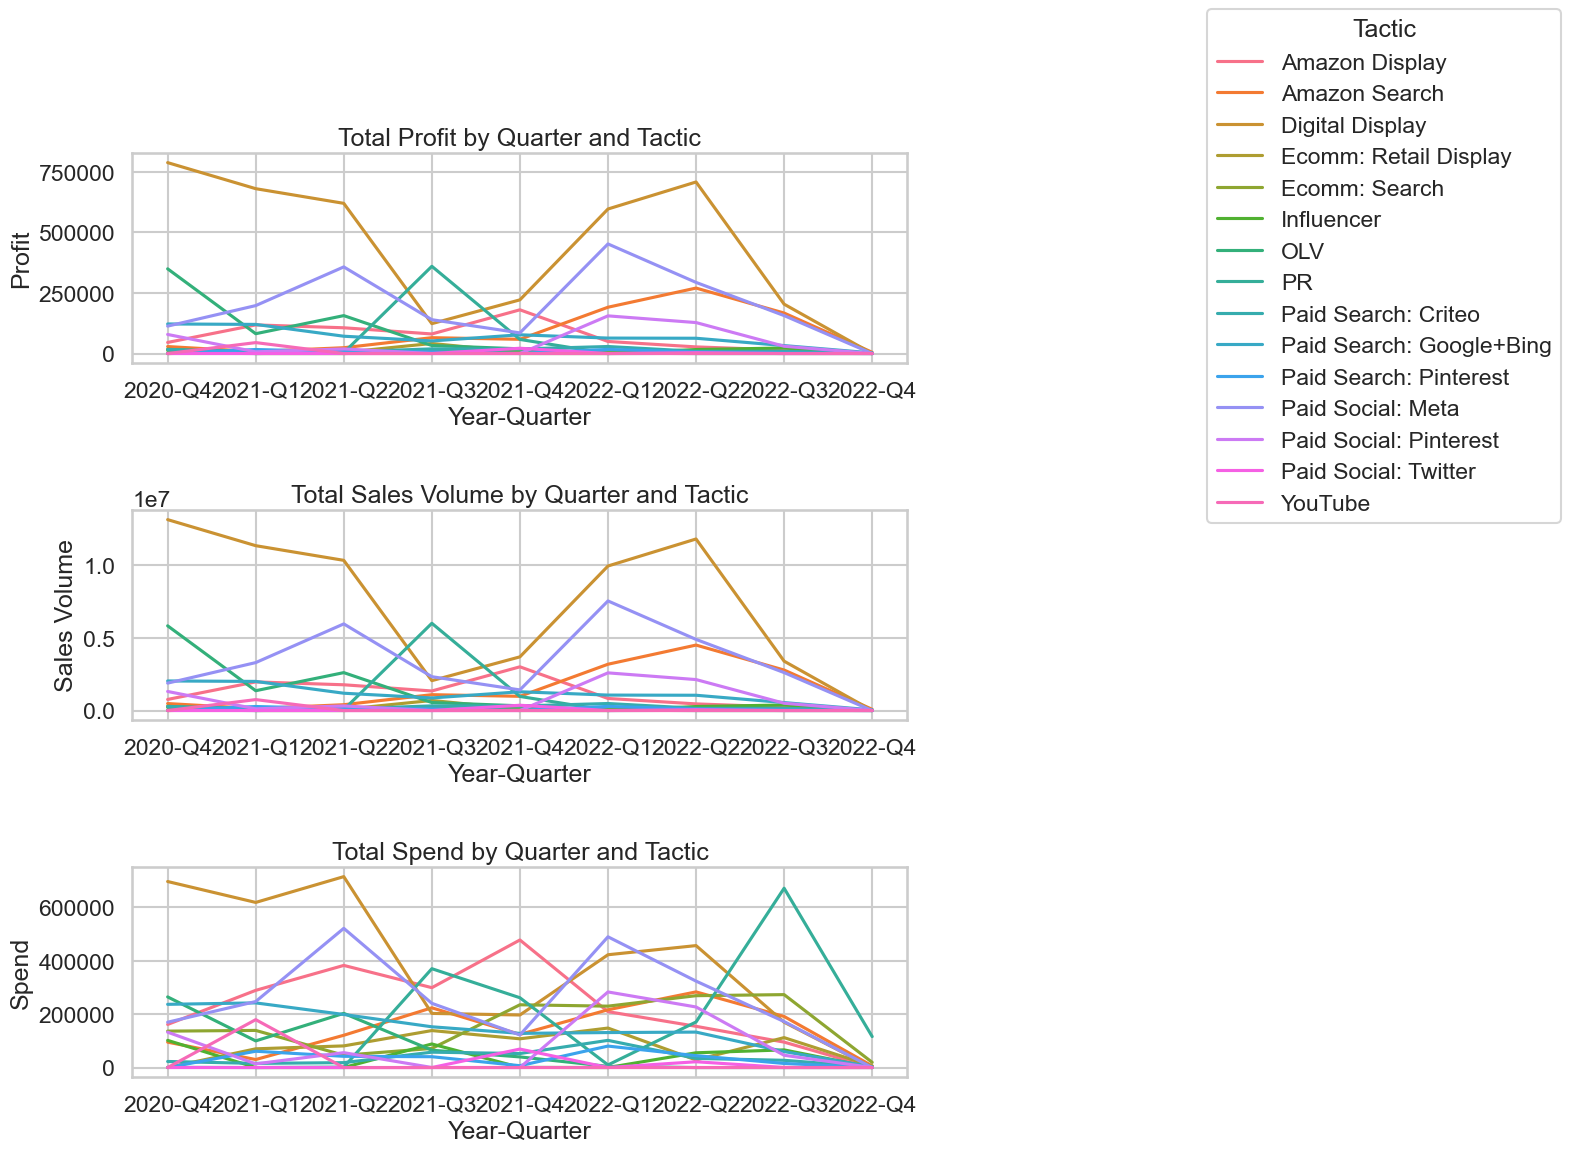

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot Total Profit by quarter and tactic
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=m1, palette='husl', ax=ax1)
ax1.set_title('Total Profit by Quarter and Tactic')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Profit')
ax1.legend().remove()  # Remove legend from subplot

# Plot Total Sales Volume by quarter and tactic
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=m2, palette='husl', ax=ax2)
ax2.set_title('Total Sales Volume by Quarter and Tactic')
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('Sales Volume')
ax2.legend().remove()  # Remove legend from subplot

# Plot Total Spend by quarter and tactic
sns.lineplot(x='year_quarter', y='Spend', hue='Tactic', data=m3, palette='husl', ax=ax3)
ax3.set_title('Total Spend by Quarter and Tactic')
ax3.set_xlabel('Year-Quarter')
ax3.set_ylabel('Spend')
ax3.legend().remove() 
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.7)

# Create common legend outside the subplots
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, title='Tactic', bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [311]:
consumer_promo_df['year_quarter'] = consumer_promo_df['year'].astype(str) + '-Q' + consumer_promo_df['quarter'].astype(str)
c1= consumer_promo_df.groupby(['year','quarter','Tactic'])['Profit'].sum().reset_index()
c1['year_quarter'] = c1['year'].astype(str) + '-Q' + c1['quarter'].astype(str)
c2 = consumer_promo_df.groupby(['year','quarter','Tactic'])['Sales Volume'].sum().reset_index()
c2['year_quarter'] = c2['year'].astype(str) + '-Q' + c2['quarter'].astype(str)
c3 = consumer_promo_df.groupby(['year','quarter','Tactic'])['Spend'].sum().reset_index()
c3['year_quarter'] = c3['year'].astype(str) + '-Q' + c3['quarter'].astype(str)

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\389124729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_promo_df['year_quarter'] = consumer_promo_df['year'].astype(str) + '-Q' + consumer_promo_df['quarter'].astype(str)


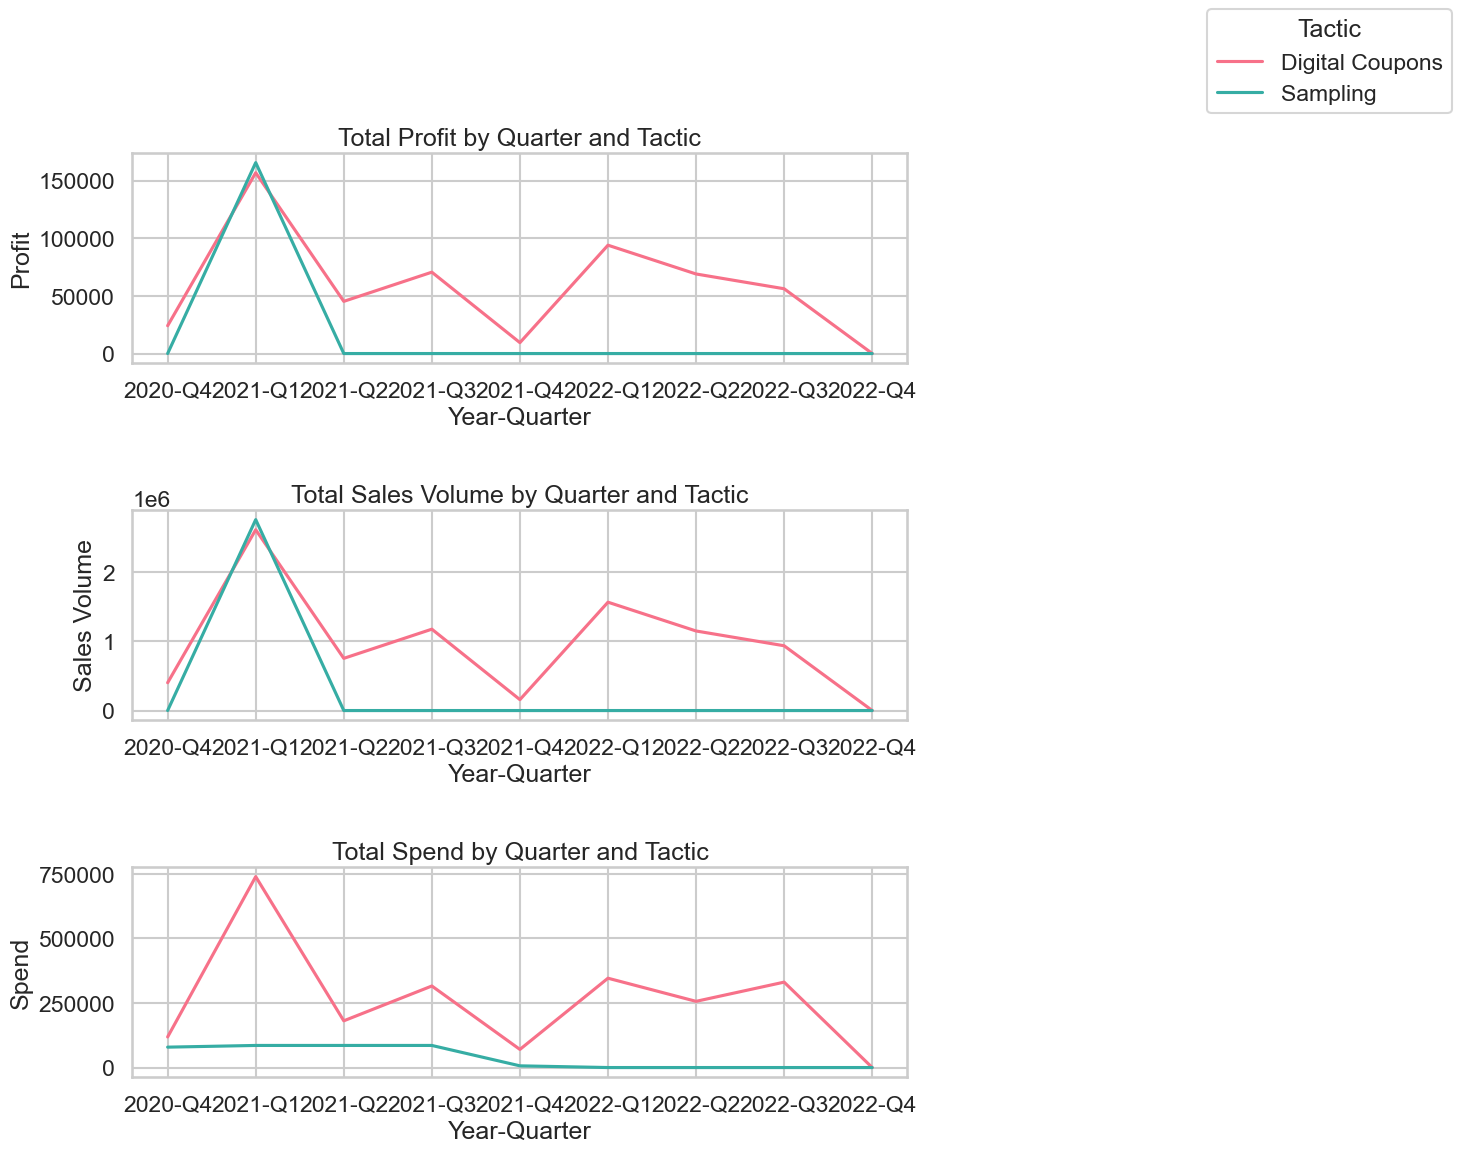

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot Total Profit by quarter and tactic
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=c1, palette='husl', ax=ax1)
ax1.set_title('Total Profit by Quarter and Tactic')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Profit')
ax1.legend().remove()  # Remove legend from subplot

# Plot Total Sales Volume by quarter and tactic
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=c2, palette='husl', ax=ax2)
ax2.set_title('Total Sales Volume by Quarter and Tactic')
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('Sales Volume')
ax2.legend().remove()  # Remove legend from subplot

# Plot Total Spend by quarter and tactic
sns.lineplot(x='year_quarter', y='Spend', hue='Tactic', data=c3, palette='husl', ax=ax3)
ax3.set_title('Total Spend by Quarter and Tactic')
ax3.set_xlabel('Year-Quarter')
ax3.set_ylabel('Spend')
ax3.legend().remove() 
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.7)

# Create common legend outside the subplots
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, title='Tactic', bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [313]:
trade_df['year_quarter'] = trade_df['year'].astype(str) + '-Q' + trade_df['quarter'].astype(str)
t1= trade_df.groupby(['year','quarter','Tactic'])['Profit'].sum().reset_index()
t1['year_quarter'] = t1['year'].astype(str) + '-Q' + t1['quarter'].astype(str)
t2 = trade_df.groupby(['year','quarter','Tactic'])['Sales Volume'].sum().reset_index()
t2['year_quarter'] = t2['year'].astype(str) + '-Q' + t2['quarter'].astype(str)
t3 = trade_df.groupby(['year','quarter','Tactic'])['Spend'].sum().reset_index()
t3['year_quarter'] = t3['year'].astype(str) + '-Q' + t3['quarter'].astype(str)

C:\Users\Yash\AppData\Local\Temp\ipykernel_19728\881556224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df['year_quarter'] = trade_df['year'].astype(str) + '-Q' + trade_df['quarter'].astype(str)


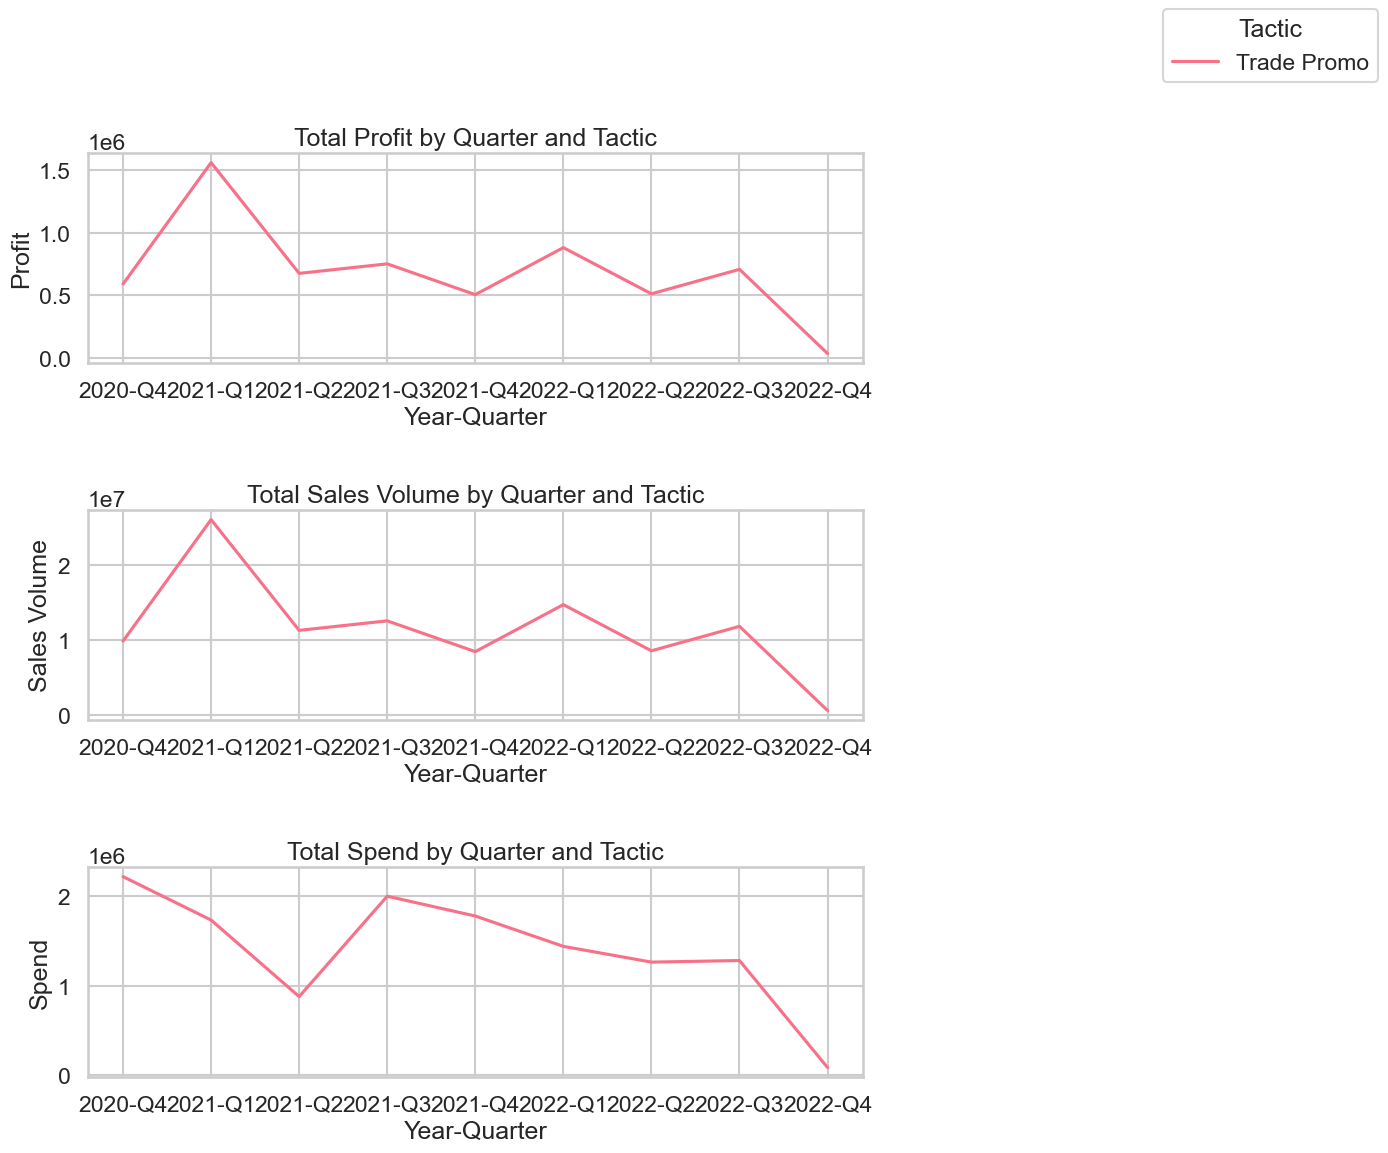

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot Total Profit by quarter and tactic
sns.lineplot(x='year_quarter', y='Profit', hue='Tactic', data=t1, palette='husl', ax=ax1)
ax1.set_title('Total Profit by Quarter and Tactic')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Profit')
ax1.legend().remove()  # Remove legend from subplot

# Plot Total Sales Volume by quarter and tactic
sns.lineplot(x='year_quarter', y='Sales Volume', hue='Tactic', data=t2, palette='husl', ax=ax2)
ax2.set_title('Total Sales Volume by Quarter and Tactic')
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('Sales Volume')
ax2.legend().remove()  # Remove legend from subplot

# Plot Total Spend by quarter and tactic
sns.lineplot(x='year_quarter', y='Spend', hue='Tactic', data=t3, palette='husl', ax=ax3)
ax3.set_title('Total Spend by Quarter and Tactic')
ax3.set_xlabel('Year-Quarter')
ax3.set_ylabel('Spend')
ax3.legend().remove() 
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.7)

# Create common legend outside the subplots
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, title='Tactic', bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.)

plt.show()
